In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy import log as ln
from termcolor import colored
from sklearn.impute import SimpleImputer
from scipy.stats import norm

Método que grafica un diagrama de barras

In [84]:
def bar_plot(x,name):
    plt.figure(figsize=(12,5))
    ax = plt.subplot()
    ax = sns.barplot(x=data[x].value_counts().index, y=data[x].value_counts(), data=data, color='gray')
    ax.set_xlabel(name,size=20)
    ax.set_ylabel('frecuencia ni',size=15)
    ax.set_title(f'Diagrama de barras {name}',size=15)
    plt.show()

Método que grafica una ojiva y el histograma

In [85]:
def hist_Ogive_plot(x,m,name):
    plt.figure(figsize=(25,15))
    ax = plt.subplot(231)
    sns.distplot(data[x], bins=m,color='gray', kde=False)
    ax.axvline(data[x].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[x].median(), c='b', linestyle = '--', label = 'Mediana')
    ax.set_title(f"Histograma de {name}",size=18)
    ax.set_ylabel('Frecuencia Absoluta ni',size=15)
    ax.set_xlabel(name,size=15)
    ax.legend()
    ax = plt.subplot(232)
    sns.kdeplot(data[x], color='gray', shade=True)
    ax.axvline(data[x].mean(), c='r', linestyle = '--', label = 'Promedio')
    ax.axvline(data[x].median(), c='b', linestyle = '--', label = 'Mediana')
    ax.set_title(f"Diagrama de densidad {name}",size=18)
    ax.set_ylabel('Frecuencia Absoluta fi',size=15)
    ax.set_xlabel(name,size=15)
    ax.legend()

    ax = plt.subplot(233)
    sns.distplot(data[x], bins=m, hist_kws=dict(cumulative=True), color='gray')
    ax.set_title(f"Diagrama de Ojiva de {name}",size=18)
    ax.set_ylabel('Freacuencia Relativa Acumulada Fi',size=15)
    ax.set_xlabel(name,size=12)

Grafica un digrama de caja

In [86]:
def box_plot(x,name):
    plt.figure(figsize=(10,5))
    ax = plt.subplot()
    ax = sns.boxplot(x=data[x], color='gray')
    ax.set_title(f'Diagrama de cajas de {name}',size=20)
    ax.set_xlabel(name,size=15)

Determina el número de intervalos que debe tener la tabla de frecuencias

In [87]:
def intervals_class(N):
    m1 = np.sqrt(N)
    m2 = 1+3.3*np.log10(N)
    m3 = ln(N)/ln(2)
    return [m1,m2,m3] 

Método que crea los intervalos que debe tener la tabla de frecuencias

In [88]:
def made_intervals_class(x, m,date,t):
    range_i =  date[x].max() - date[x].min()
    amplitude = range_i/m
    tupla = (range_i,np.rint(amplitude)) 
    if t == 1:
        tupla = (range_i,np.round(amplitude,5))
    return tupla

Método que crea la marca de clase

In [89]:
def class_mark(intervale,c):
    f_value = np.round((intervale[0][1]+intervale[0][0])/2,5)
    m_values = []
    m_values.append(f_value)
    for i in range(len(intervale)-1):
        f_value = np.round(f_value + c,5)
        m_values.append(f_value)
    return m_values

Crea tabla de frecuencia para datos cuantitativos

In [90]:
def made_frequency_table_A(x, date,t,name):
    
    m = int(np.rint(np.array(intervals_class(date[x].shape[0])).min()))
    temp = made_intervals_class(x, m,date,t)
    r = temp[0]
    c = temp[1]
    intervale = []
    n = data[x].min()
    for i in range(m):
        if i < m-1:
            intervale.append((n,np.around(n+c,5)))
            n = np.around(n+c,5)
        else:
            intervale.append((n,np.around(n+c,5)+(data[x].max()-(np.around(n+c,5)))))
    
    alfa = date[x]
    alfa = alfa.sort_values()
    
    ni = []
    for i in range(m):
        if i==0:
            a = alfa[alfa <= intervale[i][1]]
            ni.append(len(a))
        else:
            a = alfa[(alfa > intervale[i][0]) & (alfa<=intervale[i][1])]
            ni.append(len(a))
    dic = {name:intervale,'ni':ni}
    dic = pd.DataFrame(dic)
    total = dic['ni'].sum()
    dic['fi'] = dic['ni']/total
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic['Xí'] = class_mark(intervale,c)
    dic.loc[str(m)] = ['Total',total,' ',' ',' ',' ']
    return dic      

Crea tabla de frecuencia para datos categoricos

In [91]:
def made_frequency_table_B(x,date,m):
    
    intervale = []
    ni = []
    intervale = list(date[x].unique())
    ni = list(date[x].value_counts(dropna = False).values)
    dic = pd.DataFrame()
    total = np.sum(ni)
    dic[m] = intervale
    dic['ni'] = ni
    dic['fi'] = np.round(dic['ni']/total,5)
    dic['Ni'] = np.cumsum(dic['ni'])
    dic['Fi'] = np.cumsum(dic['fi'])
    dic.loc[len(ni)+1] = ['Total',total,' ',' ',' ']
    return dic

Calcula el coeficiente de asimetria y de curtosis de la distribución

In [92]:
def is_asimetric_curtosis(columna):
    asimetria = columna.skew()
    curtosis = columna.kurt()
    message = ''
    message_2 = ''
    if asimetria == 0:
        message = 'Asimetrica'
    elif asimetria > 0:
        message = 'Asimetrica con cola hacia la derecha'
    else:
        message = 'Asimetrica con cola hacia la izquierda'
    
    if curtosis == 3:
        message_2 = 'Mesocúrtica'
    elif asimetria > 3:
        message_2 = 'Leptocúrtica'
    else:
        message_2 = 'Platicúrtica'
    return asimetria, curtosis, message, message_2

# Preparación de los datos

#### Descripción de las caracteristicas ('features')
- Name: Nombre de la ventana de tiempo
- Netflows: Cantidad de Netflows en la ventana de tiempo
- First Protocol: Top 1 de los protocolos usados en la ventana de tiempo
- Second_Protocol: Top 2 de los  protocolos usados en la ventana de tiempo
- Third_Protocol: Top 3 de los  protocolos usados en la  ventana de tiempo
- P1_d: Percentil: 25% de todas las duraciones en la ventana de tiempo
- P2_d: Percentil:50% de todas las duraciones en la ventana de tiempo
- P3_d: Percentil:75% de todas las duraciones en la ventana de tiempo
- Duration: Duración total de la ventana de tiempo
- Max_d: Valor máximo de todas las duraciones en la ventana de tiempo
- Min_d: Valor mínimo de todas las duraciones en la ventana de tiempo
- Packets: Número total de paquetes en la ventana de tiempo
- Avg_bps: Promedio de bits por segundo en la ventana de tiempo
- Avg_pps: Promedio de paquetes por segundo en la ventana de tiempo
- Avg_bpp: Promedio de bytes por paquete en la ventana de tiempo
- Bytes: Número total de bytes en la ventana de tiempo
- Number_sp: Número total de puertos de origen usados en la ventana de tiempo
- Number_dp: Número total de puertos de destino usados en la ventana de tiempo
- First_sp: Top 1 de los puertos de origen en la ventana de tiempo
- Second_sp: Top 2 de los puertos de origen en la  ventana de tiempo
- Third_sp: Top 3 de los puertos de origen en la ventana de tiempo
- First_dp: Top 1 de los puertos de destino en la ventana de tiempo
- Second_dp: Top 2 de los puertos de destino en la ventana de tiempo
- Third_dp: Top 3 de los puertos de destino en la ventana de tiempo
- P1_ip: Percentil 25% de todas las entradas de paquetes en la ventana de tiempo
- P2_ip: Percentil 50% de todas las entradas de paquetes en la ventana de tiempo
- P3_ip: Percentil 75% de todas las entradas de paquetes en la ventana de tiempo
- P1_ib: Percentil 25% de todas las entradas de bytes en la ventana de tiempo
- P2_ib: Percentil 50% de todas las entradas de bytes en la ventana de tiempo
- P3_ib: Percentil 75% de todas las entradas de bytes en la ventana de tiempo
- Type: Tipo de ventana de tiempo (Minera/No minera)


In [93]:
print(colored(f'Cargamos los datos del conjunto de trafico minero identificado', attrs=['bold']))
data = pd.read_csv('./data_identificada.csv')
data.head()

Cargamos los datos del conjunto de trafico minero identificado


,index,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency
0,2189,1123-csves/1.csv,4,UDP,NaN,NaN,0.00000,0.0000,0.00000,0.000,...,41346.0,58136.0,1.00,1.0,1.00,34.25,41.5,48.75,not_mine,Does_not_have
1,600,42-csves/3.csv,15,TCP,NaN,NaN,7.40400,29.8760,50.17100,474.566,...,58780.0,NaN,3.00,17.0,26.00,397.50,874.0,3670.50,mine,Etherium
2,75,12-csves/3.csv,2,TCP,NaN,NaN,20.02425,20.0315,20.03875,40.063,...,51880.0,NaN,3.25,3.5,3.75,430.25,800.5,1170.75,mine,Bitcoin
3,326,71-csves/2.csv,2,TCP,NaN,NaN,267.50025,267.5005,267.50075,535.001,...,56490.0,NaN,18.00,18.0,18.00,4341.25,8322.5,12303.75,mine,Litecoin
4,213,47-csves/1.csv,2,TCP,NaN,NaN,531.66100,531.6610,531.66100,1063.322,...,56490.0,NaN,35.75,37.5,39.25,5530.75,9499.5,13468.25,mine,Litecoin


# Análisis inicial

In [94]:
print(colored(f'Observamos el número de registros en total, cuantos valores hay por columnas, así como sus valores nulos y el tipo de dato de cada columna.', attrs=['bold']))
data.info()

Observamos el número de registros en total, cuantos valores hay por columnas, así como sus valores nulos y el tipo de dato de cada columna.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4733 entries, 0 to 4732
Data columns (total 33 columns):
index              4733 non-null int64
Name               4733 non-null object
Netflows           4733 non-null int64
First_Protocol     4733 non-null object
Second_Protocol    2272 non-null object
Third_Protocol     129 non-null object
p1_d               4733 non-null float64
p2_d               4733 non-null float64
p3_d               4733 non-null float64
duration           4733 non-null float64
max_d              4733 non-null float64
min_d              4733 non-null float64
#packets           4733 non-null int64
Avg_bps            4733 non-null int64
Avg_pps            4733 non-null int64
Avg_bpp            4733 non-null int64
#Bytes             4733 non-null int64
#sp                4733 non-null int64
#dp                4733 non-null int

In [95]:
print(colored(f'El conjunto de datos consta de {len(data.index)} registros y {len(data.columns)} columnas', attrs=['bold']))

El conjunto de datos consta de 4733 registros y 33 columnas


### Inspección datos faltantes

In [96]:
print(colored(f'Valores faltantes por columnas, (False: Valores no nulos), (True: Valores nulos)', attrs=['bold']))
avaliable = data.isnull()
avaliable = avaliable.apply(pd.Series.value_counts)
avaliable.T

Valores faltantes por columnas, (False: Valores no nulos), (True: Valores nulos)


,False,True
index,4733.0,NaN
Name,4733.0,NaN
Netflows,4733.0,NaN
First_Protocol,4733.0,NaN
Second_Protocol,2272.0,2461.0
Third_Protocol,129.0,4604.0
p1_d,4733.0,NaN
p2_d,4733.0,NaN
p3_d,4733.0,NaN
duration,4733.0,NaN


In [97]:
n = data.shape[0]

In [98]:
porce_second_pr = np.round(avaliable['Second_Protocol'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de la columna segundo protocolo(second protocol) con respecto \n al número total de registros es de {porce_second_pr}%.', attrs=['bold']))

El porcentaje de los datos faltantes de la columna segundo protocolo(second protocol) con respecto 
 al número total de registros es de 52.0%.


In [99]:
porce_third_pr = np.round(avaliable['Third_Protocol'][1] / n,3) * 100
print(colored(f'El porcentaje de los datos faltantes de tercer protocolo(third_Protocol) con respecto al número total de registros \n es de {porce_third_pr}%.', attrs=['bold']))

El porcentaje de los datos faltantes de tercer protocolo(third_Protocol) con respecto al número total de registros 
 es de 97.3%.


<font color="blue"><b><h3> Análisis</h3></b> </font>
   - El número de valores faltantes para la columna del segundo protocolo (Second_Protocol) afecta aproximadamente el 52% de los registros, que es mas de la mitad, por tal razon decido eliminar la columna y por que los datos faltantes afectarian los analisis posteriores.
   
   - El número de valores faltantes para la columna del tercer protocolo (Third_Protocol) afecta aproximadamente el 97.3% de los registros, son casi todos los datos, por tal razon decido eliminar la columna, por que no aportara nada para mi estudio.

In [100]:
porce_sec_sp = np.round(avaliable['second_sp'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de {porce_sec_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_sp con respecto al número total de registros es de 0.7000000000000001%.


In [101]:
porce_third_sp = np.round(avaliable['third_sp'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de third_sp con respecto al número total de registros es de {porce_third_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de third_sp con respecto al número total de registros es de 45.9%.


In [102]:
porce_sec_dp = np.round(avaliable['second_dp'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de second_dp con respecto al número total de registros es de {porce_sec_dp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de second_dp con respecto al número total de registros es de 0.7000000000000001%.


In [103]:
porce_third_sp = np.round(avaliable['third_dp'][1] / n, 3) * 100
print(colored(f'El porcentaje de los datos faltantes de third_dp con respecto al número total de registros es de {porce_third_sp}%.', attrs=['bold']))

El porcentaje de los datos faltantes de third_dp con respecto al número total de registros es de 45.800000000000004%.


<font color="blue"><b><h3> Análisis</h3></b> </font>
   - El número de valores faltantes para las columnas third_sp y third_dp afecta aproximadamente 45.9% de los registos, lo cual es demasiado por lo tanto, decido remplazar los valores faltantes por la mediana de cada columna respectiva, debido a que es mas robusta a datos atipicos, en caso de que los hubiera.
   
   
   - El número de valores faltantes para las columnas second_sp y second_dp afecta aproximadamente 0.7% de los registos, cantidad muy baja, pese a lo anterior decido no eliminar los registros asociados a los valores faltantes, puesto que la mayoria son de actividad minera y quiero conservarlos para su estudio. Por lo tando remplazare los valores faltantes por la mediana, por si hay valores atipícos en la columna. 

In [104]:
print(colored(f'Elimino la columna Second_Protocol y Third_Protocol', attrs=['bold']))
data = data.drop(['Second_Protocol','Third_Protocol'], axis=1)
data.columns

Elimino la columna Second_Protocol y Third_Protocol


Index(['index', 'Name', 'Netflows', 'First_Protocol', 'p1_d', 'p2_d', 'p3_d',
       'duration', 'max_d', 'min_d', '#packets', 'Avg_bps', 'Avg_pps',
       'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp', 'second_sp', 'third_sp',
       'first_dp', 'second_dp', 'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib',
       'p2_ib', 'p3_ib', 'Type', 'Cryptocurrency'],
      dtype='object')

In [105]:
print(colored(f'Remplazo los valores faltantes de las columnas, second_sp, second_dp, third_sp y third_dp por la mediana respectiva a cada columna .', attrs=['bold']))

Remplazo los valores faltantes de las columnas, second_sp, second_dp, third_sp y third_dp por la mediana respectiva a cada columna .


In [106]:
punter = pd.concat([data['second_sp'],data['second_dp'],data['third_sp'],data['third_dp']],axis=1)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
values = imputer.fit_transform(punter)

In [107]:
punter = pd.DataFrame(values, columns = punter.columns, index = punter.index)
punter.head()

,second_sp,second_dp,third_sp,third_dp
0,41346.0,41346.0,58136.0,58136.0
1,4444.0,58780.0,123.0,443.0
2,51880.0,51880.0,123.0,443.0
3,56490.0,56490.0,123.0,443.0
4,56490.0,56490.0,123.0,443.0


In [108]:
data = data.drop(['second_sp','second_dp','third_sp','third_dp'],axis=1)

In [109]:
data =pd.concat([data,punter],axis=1)
data.head()

,index,Name,Netflows,First_Protocol,p1_d,p2_d,p3_d,duration,max_d,min_d,...,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency,second_sp,second_dp,third_sp,third_dp
0,2189,1123-csves/1.csv,4,UDP,0.00000,0.0000,0.00000,0.000,0.000,0.000,...,1.00,34.25,41.5,48.75,not_mine,Does_not_have,41346.0,41346.0,58136.0,58136.0
1,600,42-csves/3.csv,15,TCP,7.40400,29.8760,50.17100,474.566,83.224,0.000,...,26.00,397.50,874.0,3670.50,mine,Etherium,4444.0,58780.0,123.0,443.0
2,75,12-csves/3.csv,2,TCP,20.02425,20.0315,20.03875,40.063,20.046,20.017,...,3.75,430.25,800.5,1170.75,mine,Bitcoin,51880.0,51880.0,123.0,443.0
3,326,71-csves/2.csv,2,TCP,267.50025,267.5005,267.50075,535.001,267.501,267.500,...,18.00,4341.25,8322.5,12303.75,mine,Litecoin,56490.0,56490.0,123.0,443.0
4,213,47-csves/1.csv,2,TCP,531.66100,531.6610,531.66100,1063.322,531.661,531.661,...,39.25,5530.75,9499.5,13468.25,mine,Litecoin,56490.0,56490.0,123.0,443.0


### Inspección de tipo de dato incorrecto

<font color="blue"><b><h3> Análisis</h3></b> </font>
- Las variables second_sp, second_dp, third_sp y third_dp son de naturaleza discreta, pero tienen el tipo de dato continuo, por tal razon decido cambiarles su tipo de dato continuo a discreto

In [110]:
data = data.astype({'second_sp':'int64'})
data = data.astype({'second_dp':'int64'})
data = data.astype({'third_sp':'int64'})
data = data.astype({'third_dp':'int64'})

### Variables de referencia

<font color="blue"><b><h3> Análisis</h3></b> </font>
- Las variables Nombre(Name) e indices(Index) son columnas que hacen referencia al nombre y al indice que ocupa el registro en el conjunto de datos. Por tal razón decido eliminarlas.

In [111]:
data = data.drop(['Name', 'index'], axis=1)
data.columns

Index(['Netflows', 'First_Protocol', 'p1_d', 'p2_d', 'p3_d', 'duration',
       'max_d', 'min_d', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes',
       '#sp', '#dp', 'first_sp', 'first_dp', 'p1_ip', 'p2_ip', 'p3_ip',
       'p1_ib', 'p2_ib', 'p3_ib', 'Type', 'Cryptocurrency', 'second_sp',
       'second_dp', 'third_sp', 'third_dp'],
      dtype='object')

### Estructuración del conjunto de datos
Agrupo las columnas de tipo discretas(int64), continuas(float64) y categóricas(object) por separado, para hacer una análisis más organizado.

In [112]:
data_numeric_int = (data.dtypes == "int64")
data_numeric_float = (data.dtypes == "float64")
data_object  = (data.dtypes == "object")
data_numeric_int = [c for c in data_numeric_int.index if data_numeric_int[c]]
data_numeric_float = [c for c in data_numeric_float.index if data_numeric_float[c]]
data_object = [c for c in data_object.index if data_object[c]]

Variables cuantitativas discretas

In [113]:
print(data_numeric_int)

['Netflows', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_sp', 'first_dp', 'second_sp', 'second_dp', 'third_sp', 'third_dp']


Variables cuantitativas continuas

In [114]:
print(data_numeric_float)

['p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib']


Variables categoricas

In [115]:
print(data_object)

['First_Protocol', 'Type', 'Cryptocurrency']


### Balance del conjunto de datos
Analizare si la data esta balanceada

Text(0, 0.5, 'Cantidad de observaciones')

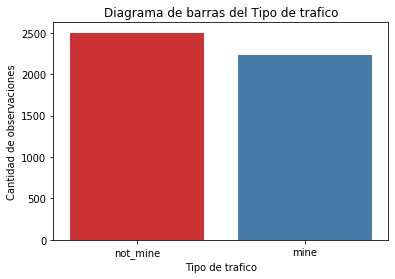

In [116]:
ax = sns.countplot(x='Type', data=data, palette="Set1")
ax.set_title("Diagrama de barras del Tipo de trafico")
ax.set_xlabel('Tipo de trafico')
ax.set_ylabel('Cantidad de observaciones')

### Valores atipicos

In [117]:
data_numerico = data_numeric_int + data_numeric_float

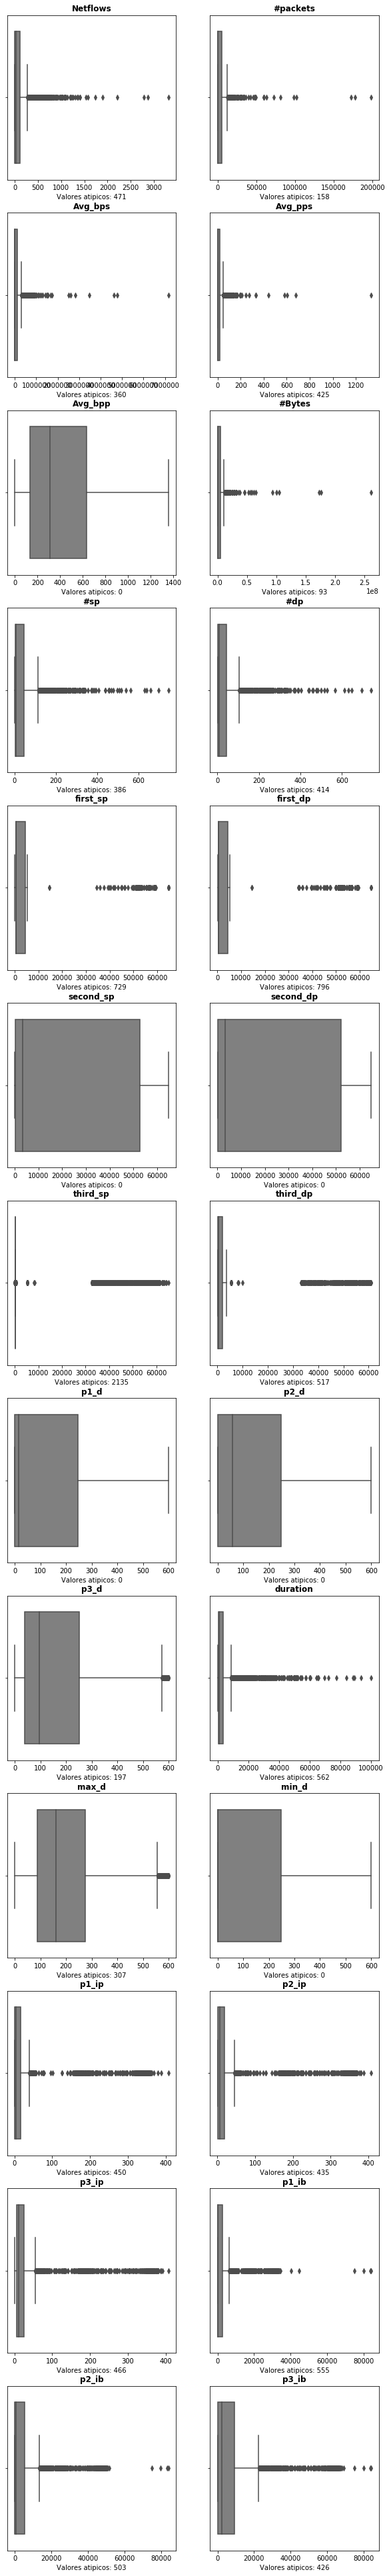

In [118]:
fig, axes = plt.subplots(nrows=13, ncols = 2, figsize=(10,70))
col = data_numerico
u = 0
for i in range(13):
    for j in range(2):
        m = col[u]
        q1 = data[m].quantile(0.25)
        q3 = data[m].quantile(0.75)
        q2 = data[m].quantile(0.5)
        ric = q3-q1
        borde_s = q3 + 1.5*ric
        borde_i = q1-1.5*ric
        atip_s = data[data[m]>borde_s].shape[0]
        atip_i = data[data[m]<borde_i].shape[0]
        sns.boxplot(x=data[col[u]], color='gray', ax = axes[i][j]) 
        axes[i][j].set_title(col[u],fontsize = 12, fontweight = "bold")
        axes[i][j].set_xlabel(f'Valores atipicos: {atip_s+atip_i}')
        u = u +1

# Inspección de datos no agrupados

### Datos categoricos 

In [119]:
print(colored(f'Variables categoricas', attrs=['bold']))
data[data_object].describe()

Variables categoricas


,First_Protocol,Type,Cryptocurrency
count,4733,4733,4733
unique,4,2,6
top,TCP,not_mine,Does_not_have
freq,4227,2501,2501


<font color="blue"><b><h3> Análisis</h3></b> </font>

### Datos continuos

In [120]:
print(colored(f'Variables continuas', attrs=['bold']))
data[data_numeric_float].describe().T

Variables continuas


,count,mean,std,min,25%,50%,75%,max
p1_d,4733.0,133.499145,190.475068,0.0,0.000,13.9345,247.59925,599.533
p2_d,4733.0,148.935284,185.152649,0.0,0.813,58.3345,248.31300,599.533
p3_d,4733.0,169.899109,176.883018,0.0,37.342,96.0300,251.91275,599.533
duration,4733.0,3857.288985,7896.290798,0.0,524.756,1055.2150,3830.02700,100119.108
max_d,4733.0,205.818681,162.263467,0.0,88.019,159.9850,275.62500,599.533
min_d,4733.0,121.916729,194.930279,0.0,0.000,0.0000,247.45600,599.533
p1_ip,4733.0,25.790091,67.263351,1.0,1.000,4.0000,16.25000,407.000
p2_ip,4733.0,28.686351,68.933405,1.0,2.000,7.0000,19.50000,407.000
p3_ip,4733.0,33.914800,70.675364,1.0,5.000,12.0000,25.00000,407.000
p1_ib,4733.0,2918.492658,6795.706154,16.0,48.000,180.0000,2612.00000,84119.000


<font color="blue"><b><h3> Análisis</h3></b> </font>

### Datos discretos

In [121]:
print(colored(f'Variables discretas', attrs=['bold']))
data[data_numeric_int].describe().T

Variables discretas


,count,mean,std,min,25%,50%,75%,max
Netflows,4733.0,9.824128e+01,1.915744e+02,1.0,2.0,23.0,110.0,3313.0
#packets,4733.0,2.673519e+03,7.140684e+03,1.0,54.0,332.0,5107.0,198794.0
Avg_bps,4733.0,8.216193e+04,2.251706e+05,0.0,491.0,1279.0,125428.0,7161568.0
Avg_pps,4733.0,1.402240e+01,3.577477e+01,0.0,0.0,1.0,19.0,1333.0
Avg_bpp,4733.0,3.760038e+02,2.990786e+02,0.0,133.0,313.0,634.0,1356.0
#Bytes,4733.0,2.024831e+06,7.010679e+06,33.0,15504.0,40328.0,4578769.0,261143006.0
#sp,4733.0,3.677139e+01,6.248541e+01,1.0,2.0,8.0,47.0,745.0
#dp,4733.0,3.529939e+01,6.154510e+01,1.0,2.0,8.0,43.0,740.0
first_sp,4733.0,9.954266e+03,1.951551e+04,0.0,443.0,443.0,4444.0,64790.0
first_dp,4733.0,1.068718e+04,2.016901e+04,53.0,443.0,443.0,4444.0,64790.0


<font color="blue"><b><h3> Análisis</h3></b> </font>

# Inspección de datos agrupados

In [122]:
data_object_list = data_object
tables_frequency_cualitative = []
namess = data_object
for j, i in enumerate(data_object_list):
    tables_frequency_cualitative.append(made_frequency_table_B(i, data,namess[j]))

Tabla de frecuencia First_Protocol


,First_Protocol,ni,fi,Ni,Fi
0,UDP,4227,0.89309,4227,0.89309
1,TCP,504,0.10649,4731,0.99958
2,ICMP,1,0.00021,4732,0.99979
3,ICMP6,1,0.00021,4733,1
5,Total,4733,,,


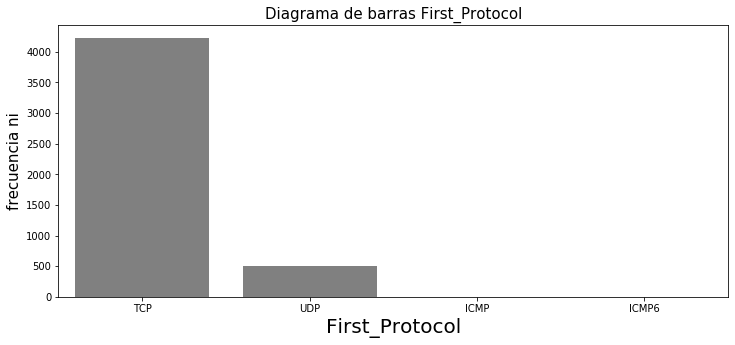

TCP      4227
UDP       504
ICMP        1
ICMP6       1
Name: First_Protocol, dtype: int64
El protocolo con mas observaciones (Moda) en el conjunto de datos es el TCP con 4227 registros.


In [123]:
print(colored(f'Tabla de frecuencia {namess[0]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[0])
display(table_f)
bar_plot(data_object_list[0],namess[0])
v = data[data_object_list[0]].value_counts()

print(v)
print(colored(f'El protocolo con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Type


,Type,ni,fi,Ni,Fi
0,not_mine,2501,0.52842,2501,0.52842
1,mine,2232,0.47158,4733,1
3,Total,4733,,,


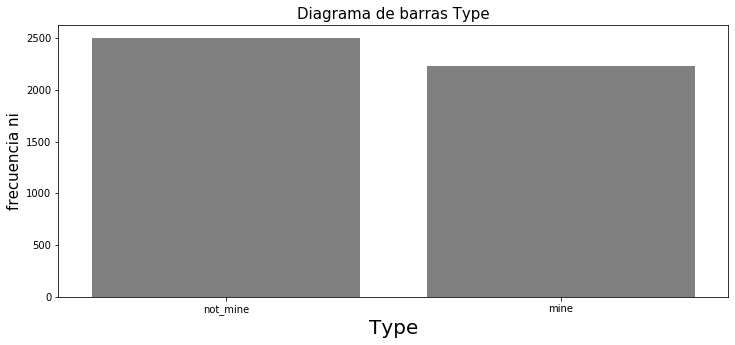

not_mine    2501
mine        2232
Name: Type, dtype: int64
El trafico con mas observaciones (Moda) en el conjunto de datos es el not_mine con 2501 registros.


In [124]:
print(colored(f'Tabla de frecuencia {namess[1]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[1])
display(table_f)
bar_plot(data_object_list[1],namess[1])
v = data[data_object_list[1]].value_counts()
print(v)
print(colored(f'El trafico con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

Tabla de frecuencia Cryptocurrency


,Cryptocurrency,ni,fi,Ni,Fi
0,Does_not_have,2501,0.52842,2501,0.52842
1,Etherium,959,0.20262,3460,0.73104
2,Bitcoin,485,0.10247,3945,0.83351
3,Litecoin,349,0.07374,4294,0.90725
4,Monero,247,0.05219,4541,0.95944
5,Bitcash,192,0.04057,4733,1.00001
7,Total,4733,,,


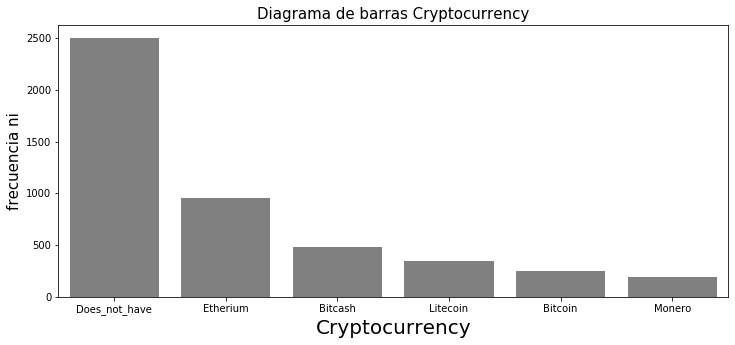

Does_not_have    2501
Etherium          959
Bitcash           485
Litecoin          349
Bitcoin           247
Monero            192
Name: Cryptocurrency, dtype: int64
La criptomoneda con mas observaciones (Moda) en el conjunto de datos es el Does_not_have con 2501 registros.


In [125]:
print(colored(f'Tabla de frecuencia {namess[2]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_cualitative[2])
display(table_f)
bar_plot(data_object_list[2],namess[2])
v = data[data_object_list[2]].value_counts()
print(v)
print(colored(f'La criptomoneda con mas observaciones (Moda) en el conjunto de datos es el {v.index[0]} con {v[0]} registros.',attrs=['bold']))

### Datos continuos

In [126]:
data_numeric_float_list = data_numeric_float
name_f = data_numeric_float
tables_frequency_fl = []
for j, i in enumerate(data_numeric_float_list):
    tables_frequency_fl.append(made_frequency_table_A(i, data,1, name_f[j]))

In [127]:
m = intervals_class(data.shape[0])
m = int(np.rint(np.min(m)))
m

12

Tabla de frecuencia de p1_d


,p1_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 49.96108)",2771,0.585464,2771,0.585464,24.9805
1,"(49.96108, 99.92216)",301,0.063596,3072,0.64906,74.9416
2,"(99.92216, 149.88324)",138,0.029157,3210,0.678217,124.903
3,"(149.88324, 199.84432)",95,0.0200718,3305,0.698289,174.864
4,"(199.84432, 249.8054)",262,0.055356,3567,0.753645,224.825
5,"(249.8054, 299.76648)",441,0.0931756,4008,0.84682,274.786
6,"(299.76648, 349.72756)",61,0.0128882,4069,0.859708,324.747
7,"(349.72756, 399.68864)",41,0.00866258,4110,0.868371,374.708
8,"(399.68864, 449.64972)",36,0.00760617,4146,0.875977,424.669
9,"(449.64972, 499.6108)",38,0.00802873,4184,0.884006,474.63


El coeficiente de asimetria es de 1.2971050936520159, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 0.327064864073364, la distribución es Platicúrtica.


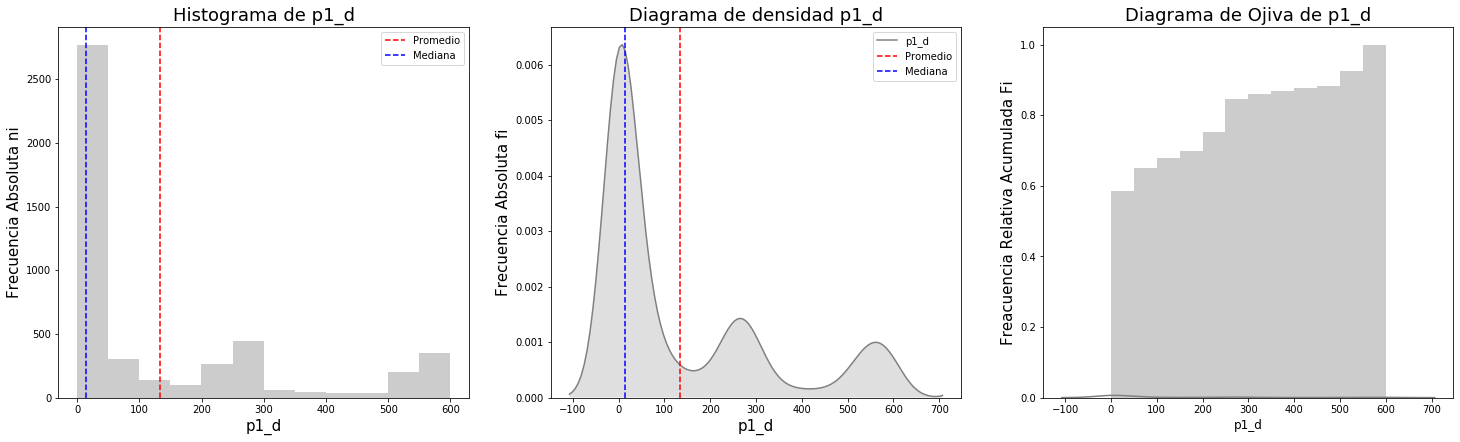

In [128]:
u = 0
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p2_d


,p2_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 49.96108)",2283,0.482358,2283,0.482358,24.9805
1,"(49.96108, 99.92216)",463,0.0978238,2746,0.580182,74.9416
2,"(99.92216, 149.88324)",303,0.0640186,3049,0.6442,124.903
3,"(149.88324, 199.84432)",192,0.0405662,3241,0.684767,174.864
4,"(199.84432, 249.8054)",323,0.0682442,3564,0.753011,224.825
5,"(249.8054, 299.76648)",444,0.0938094,4008,0.84682,274.786
6,"(299.76648, 349.72756)",56,0.0118318,4064,0.858652,324.747
7,"(349.72756, 399.68864)",39,0.00824002,4103,0.866892,374.708
8,"(399.68864, 449.64972)",41,0.00866258,4144,0.875555,424.669
9,"(449.64972, 499.6108)",38,0.00802873,4182,0.883583,474.63


El coeficiente de asimetria es de 1.218563310130718, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 0.2570822434357325, la distribución es Platicúrtica.


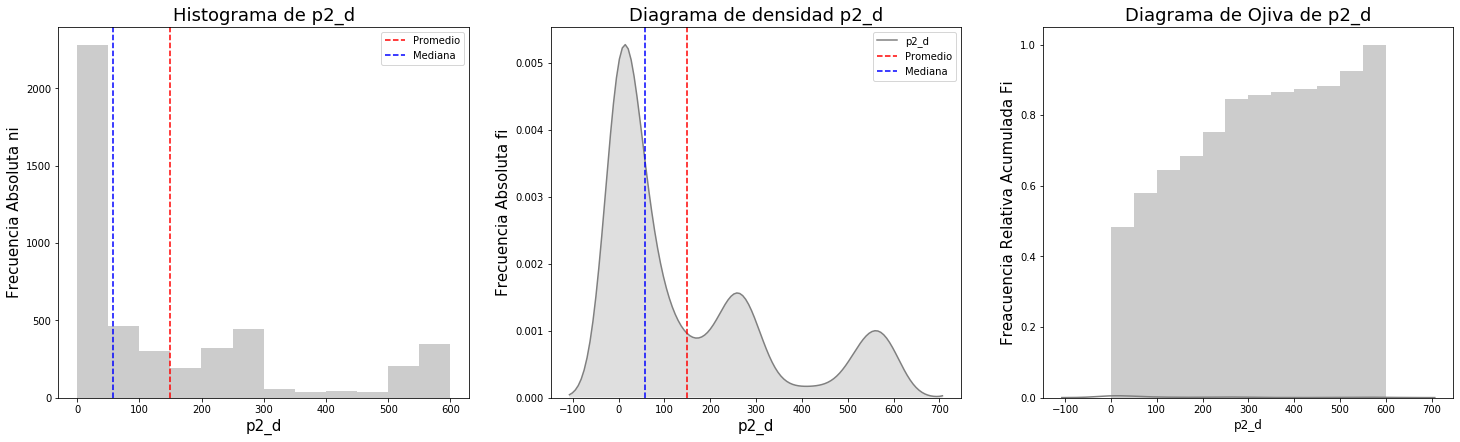

In [129]:
u = 1
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p3_d


,p3_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 49.96108)",1692,0.35749,1692,0.35749,24.9805
1,"(49.96108, 99.92216)",688,0.145362,2380,0.502852,74.9416
2,"(99.92216, 149.88324)",447,0.0944433,2827,0.597296,124.903
3,"(149.88324, 199.84432)",233,0.0492288,3060,0.646524,174.864
4,"(199.84432, 249.8054)",473,0.0999366,3533,0.746461,224.825
5,"(249.8054, 299.76648)",471,0.0995141,4004,0.845975,274.786
6,"(299.76648, 349.72756)",57,0.0120431,4061,0.858018,324.747
7,"(349.72756, 399.68864)",40,0.0084513,4101,0.866469,374.708
8,"(399.68864, 449.64972)",34,0.0071836,4135,0.873653,424.669
9,"(449.64972, 499.6108)",43,0.00908515,4178,0.882738,474.63


El coeficiente de asimetria es de 1.1434644350526824, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 0.23424575236338407, la distribución es Platicúrtica.


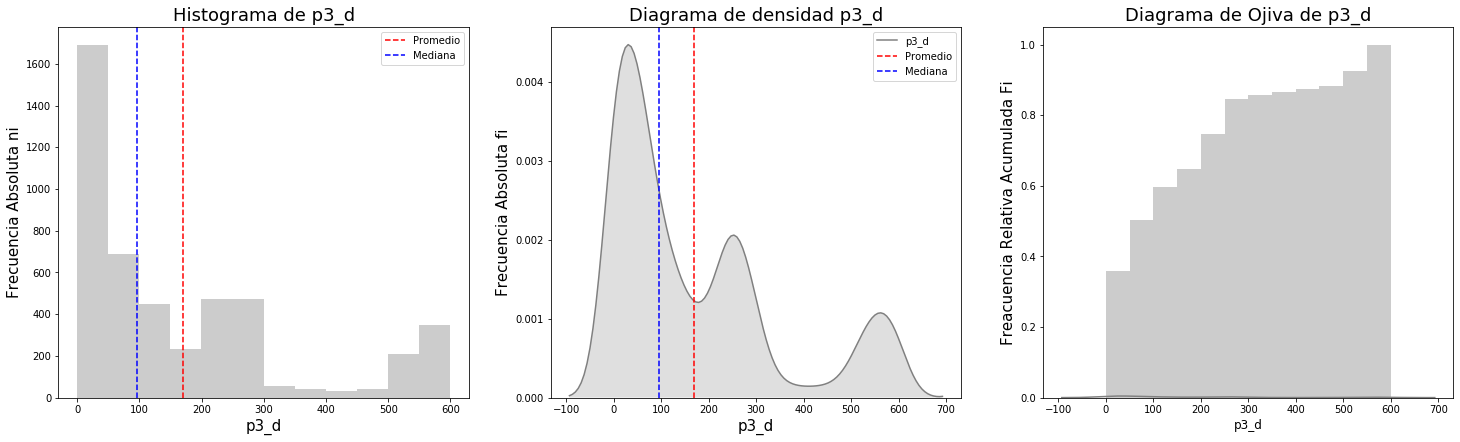

In [130]:
u = 2
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de duration


,duration,ni,fi,Ni,Fi,Xí
0,"(0.0, 8343.259)",4141,0.874921,4141,0.874921,4171.63
1,"(8343.259, 16686.518)",356,0.0752166,4497,0.950137,12514.9
2,"(16686.518, 25029.777)",113,0.0238749,4610,0.974012,20858.1
3,"(25029.777, 33373.036)",46,0.00971899,4656,0.983731,29201.4
4,"(33373.036, 41716.295)",30,0.00633847,4686,0.99007,37544.7
5,"(41716.295, 50059.554)",18,0.00380308,4704,0.993873,45887.9
6,"(50059.554, 58402.813)",15,0.00316924,4719,0.997042,54231.2
7,"(58402.813, 66746.072)",6,0.00126769,4725,0.99831,62574.4
8,"(66746.072, 75089.331)",2,0.000422565,4727,0.998732,70917.7
9,"(75089.331, 83432.59)",1,0.000211282,4728,0.998944,79261


El coeficiente de asimetria es de 4.8780841834789666, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 32.97211532078374, la distribución es Leptocúrtica.


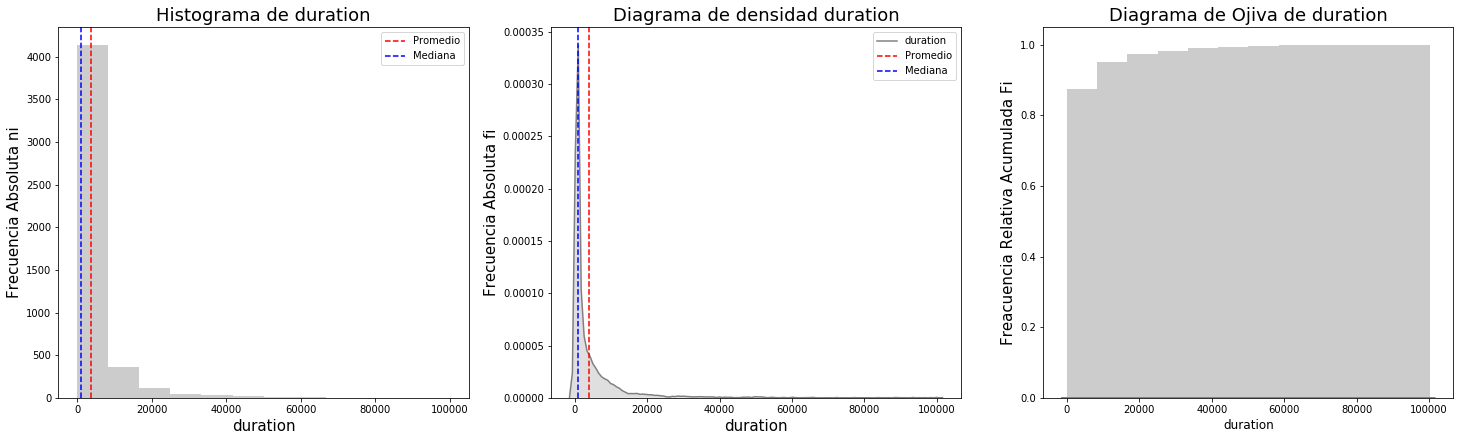

In [131]:
u = 3
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de max_d


,max_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 49.96108)",590,0.124657,590,0.124657,24.9805
1,"(49.96108, 99.92216)",852,0.180013,1442,0.304669,74.9416
2,"(99.92216, 149.88324)",839,0.177266,2281,0.481935,124.903
3,"(149.88324, 199.84432)",424,0.0895838,2705,0.571519,174.864
4,"(199.84432, 249.8054)",544,0.114938,3249,0.686457,224.825
5,"(249.8054, 299.76648)",744,0.157194,3993,0.843651,274.786
6,"(299.76648, 349.72756)",64,0.0135221,4057,0.857173,324.747
7,"(349.72756, 399.68864)",44,0.00929643,4101,0.866469,374.708
8,"(399.68864, 449.64972)",31,0.00654976,4132,0.873019,424.669
9,"(449.64972, 499.6108)",38,0.00802873,4170,0.881048,474.63


El coeficiente de asimetria es de 1.0224494578084593, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 0.2590337012107935, la distribución es Platicúrtica.


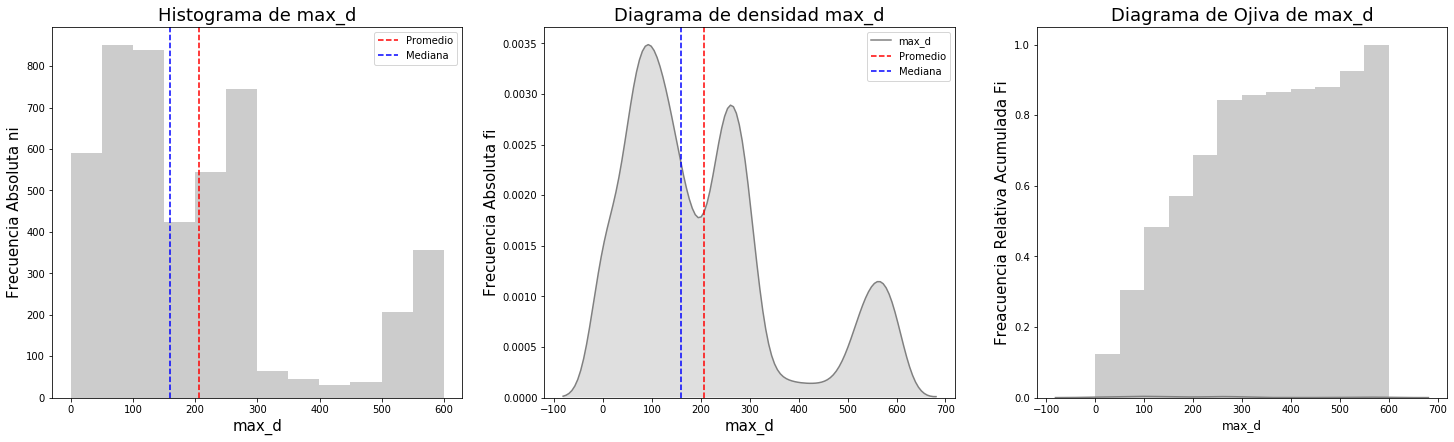

In [132]:
u = 4
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de min_d


,min_d,ni,fi,Ni,Fi,Xí
0,"(0.0, 49.96108)",3194,0.674836,3194,0.674836,24.9805
1,"(49.96108, 99.92216)",48,0.0101416,3242,0.684978,74.9416
2,"(99.92216, 149.88324)",32,0.00676104,3274,0.691739,124.903
3,"(149.88324, 199.84432)",35,0.00739489,3309,0.699134,174.864
4,"(199.84432, 249.8054)",259,0.0547222,3568,0.753856,224.825
5,"(249.8054, 299.76648)",450,0.0950771,4018,0.848933,274.786
6,"(299.76648, 349.72756)",56,0.0118318,4074,0.860765,324.747
7,"(349.72756, 399.68864)",38,0.00802873,4112,0.868794,374.708
8,"(399.68864, 449.64972)",34,0.0071836,4146,0.875977,424.669
9,"(449.64972, 499.6108)",38,0.00802873,4184,0.884006,474.63


El coeficiente de asimetria es de 1.3428773270705134, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 0.3558410822114979, la distribución es Platicúrtica.


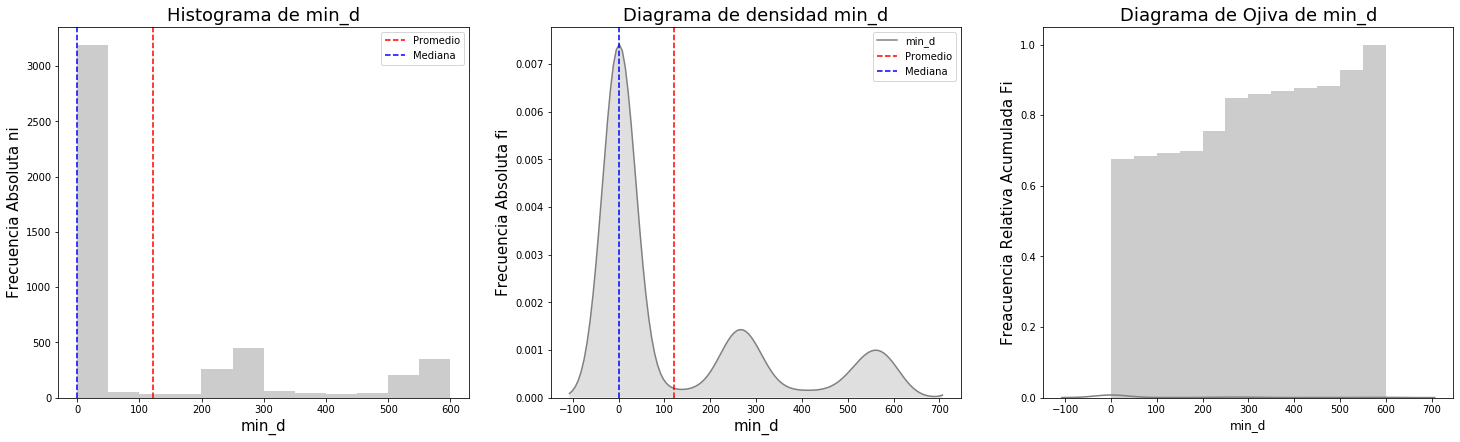

In [133]:
u = 5
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p1_ip


,p1_ip,ni,fi,Ni,Fi,Xí
0,"(1.0, 34.83333)",4227,0.893091,4227,0.893091,17.9167
1,"(34.83333, 68.66666)",169,0.0357067,4396,0.928798,51.75
2,"(68.66666, 102.49999)",6,0.00126769,4402,0.930065,85.5833
3,"(102.49999, 136.33332)",2,0.000422565,4404,0.930488,119.417
4,"(136.33332, 170.16665)",50,0.0105641,4454,0.941052,153.25
5,"(170.16665, 203.99998)",86,0.0181703,4540,0.959222,187.083
6,"(203.99998, 237.83331)",23,0.0048595,4563,0.964082,220.917
7,"(237.83331, 271.66664)",14,0.00295795,4577,0.96704,254.75
8,"(271.66664, 305.49997)",17,0.0035918,4594,0.970632,288.583
9,"(305.49997, 339.3333)",69,0.0145785,4663,0.98521,322.417


El coeficiente de asimetria es de 3.75221044780774, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 13.478350625384959, la distribución es Leptocúrtica.


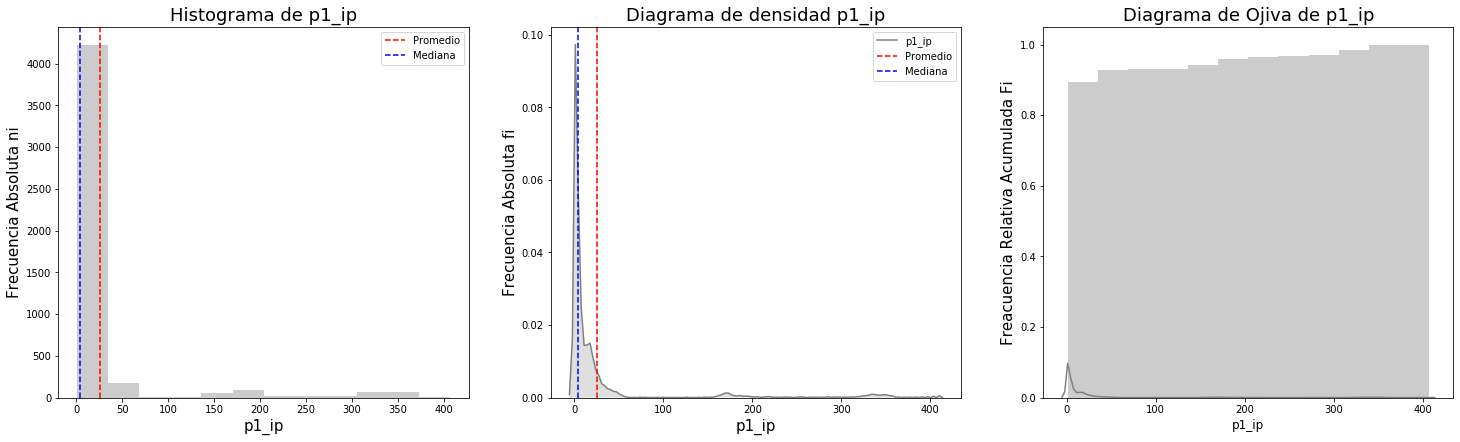

In [134]:
u = 6
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p2_ip


,p2_ip,ni,fi,Ni,Fi,Xí
0,"(1.0, 34.83333)",4147,0.876188,4147,0.876188,17.9167
1,"(34.83333, 68.66666)",234,0.0494401,4381,0.925629,51.75
2,"(68.66666, 102.49999)",17,0.0035918,4398,0.92922,85.5833
3,"(102.49999, 136.33332)",6,0.00126769,4404,0.930488,119.417
4,"(136.33332, 170.16665)",25,0.00528206,4429,0.93577,153.25
5,"(170.16665, 203.99998)",107,0.0226072,4536,0.958377,187.083
6,"(203.99998, 237.83331)",22,0.00464821,4558,0.963026,220.917
7,"(237.83331, 271.66664)",17,0.0035918,4575,0.966617,254.75
8,"(271.66664, 305.49997)",16,0.00338052,4591,0.969998,288.583
9,"(305.49997, 339.3333)",32,0.00676104,4623,0.976759,322.417


El coeficiente de asimetria es de 3.71098772593895, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 13.24302753448481, la distribución es Leptocúrtica.


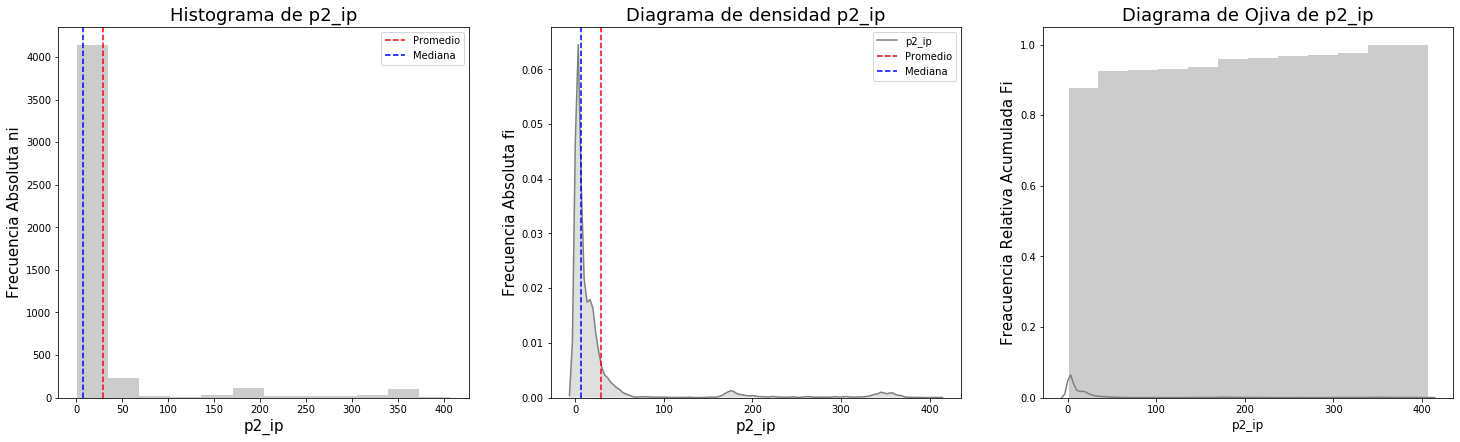

In [135]:
u = 7
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p3_ip


,p3_ip,ni,fi,Ni,Fi,Xí
0,"(1.0, 34.83333)",3935,0.831397,3935,0.831397,17.9167
1,"(34.83333, 68.66666)",398,0.0840904,4333,0.915487,51.75
2,"(68.66666, 102.49999)",40,0.0084513,4373,0.923938,85.5833
3,"(102.49999, 136.33332)",21,0.00443693,4394,0.928375,119.417
4,"(136.33332, 170.16665)",18,0.00380308,4412,0.932178,153.25
5,"(170.16665, 203.99998)",113,0.0238749,4525,0.956053,187.083
6,"(203.99998, 237.83331)",30,0.00633847,4555,0.962392,220.917
7,"(237.83331, 271.66664)",15,0.00316924,4570,0.965561,254.75
8,"(271.66664, 305.49997)",16,0.00338052,4586,0.968941,288.583
9,"(305.49997, 339.3333)",19,0.00401437,4605,0.972956,322.417


El coeficiente de asimetria es de 3.5892567130022375, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 12.535531736594477, la distribución es Leptocúrtica.


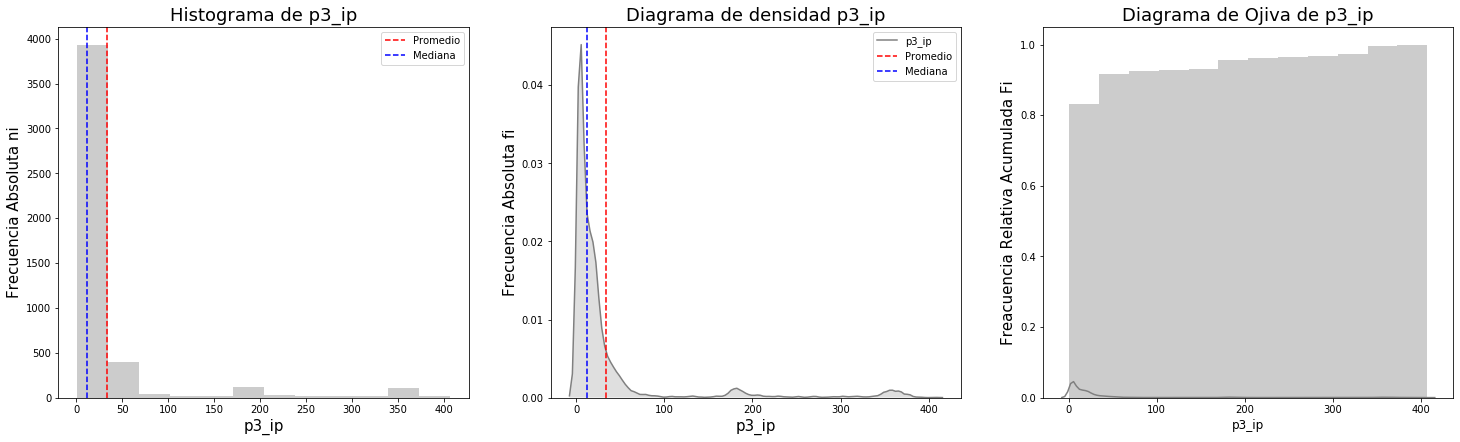

In [136]:
u = 8
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p1_ib


,p1_ib,ni,fi,Ni,Fi,Xí
0,"(16.0, 7024.58333)",4211,0.889711,4211,0.889711,3520.29
1,"(7024.58333, 14033.16666)",193,0.0407775,4404,0.930488,10528.9
2,"(14033.16666, 21041.74999)",151,0.0319037,4555,0.962392,17537.5
3,"(21041.74999, 28050.33332)",38,0.00802873,4593,0.97042,24546
4,"(28050.33332, 35058.91665)",134,0.0283119,4727,0.998732,31554.6
5,"(35058.91665, 42067.49998)",1,0.000211282,4728,0.998944,38563.2
6,"(42067.49998, 49076.08331)",1,0.000211282,4729,0.999155,45571.8
7,"(49076.08331, 56084.66664)",0,0,4729,0.999155,52580.4
8,"(56084.66664, 63093.24997)",0,0,4729,0.999155,59589
9,"(63093.24997, 70101.8333)",0,0,4729,0.999155,66597.5


El coeficiente de asimetria es de 4.019051645400382, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 22.68473742859825, la distribución es Leptocúrtica.


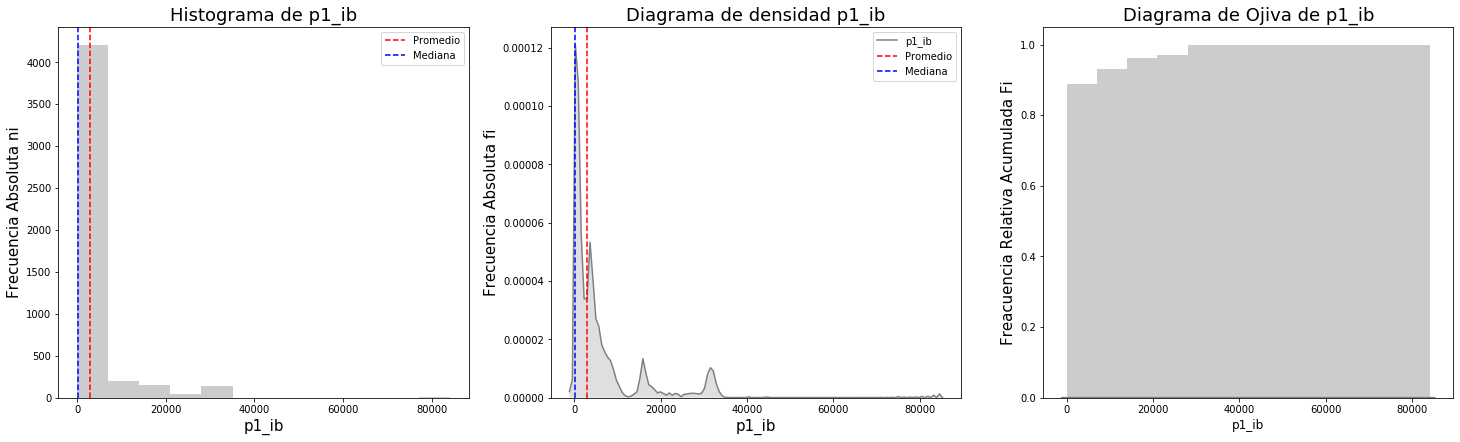

In [137]:
u = 9
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p2_ib


,p2_ib,ni,fi,Ni,Fi,Xí
0,"(20.0, 7028.25)",3738,0.789774,3738,0.789774,3524.12
1,"(7028.25, 14036.5)",524,0.110712,4262,0.900486,10532.4
2,"(14036.5, 21044.75)",147,0.0310585,4409,0.931544,17540.6
3,"(21044.75, 28053.0)",131,0.027678,4540,0.959222,24548.9
4,"(28053.0, 35061.25)",27,0.00570463,4567,0.964927,31557.1
5,"(35061.25, 42069.5)",26,0.00549334,4593,0.97042,38565.4
6,"(42069.5, 49077.75)",115,0.0242975,4708,0.994718,45573.6
7,"(49077.75, 56086.0)",21,0.00443693,4729,0.999155,52581.9
8,"(56086.0, 63094.25)",0,0,4729,0.999155,59590.1
9,"(63094.25, 70102.5)",0,0,4729,0.999155,66598.4


El coeficiente de asimetria es de 3.1721555920575497, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 11.129250315474824, la distribución es Leptocúrtica.


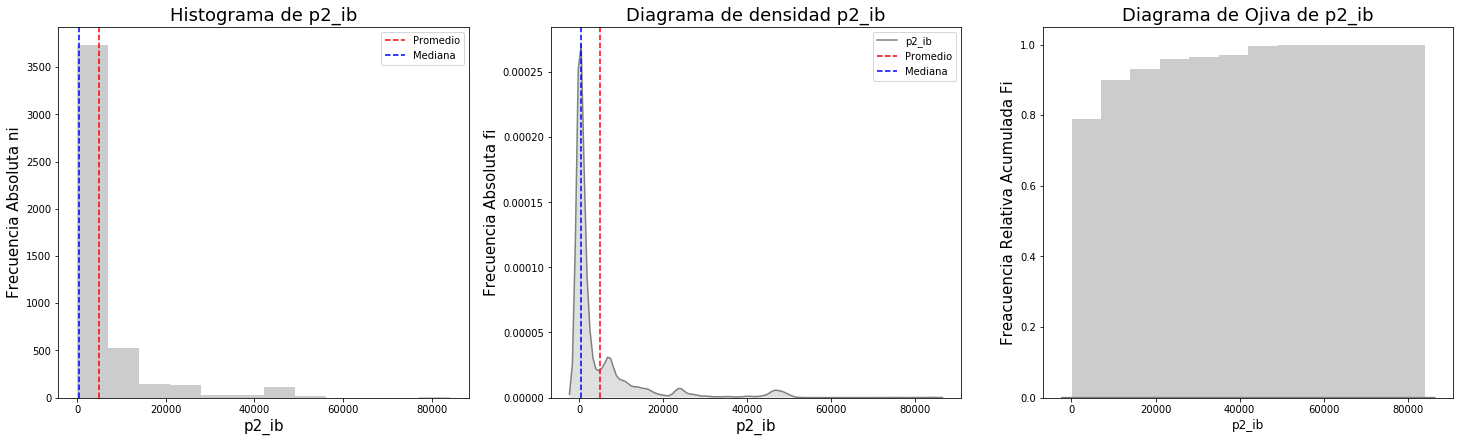

In [138]:
u = 10
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de p3_ib


,p3_ib,ni,fi,Ni,Fi,Xí
0,"(28.5, 7036.04167)",3340,0.705683,3340,0.705683,3532.27
1,"(7036.04167, 14043.58334)",661,0.139658,4001,0.845341,10539.8
2,"(14043.58334, 21051.12501)",276,0.058314,4277,0.903655,17547.4
3,"(21051.12501, 28058.66668)",120,0.0253539,4397,0.929009,24554.9
4,"(28058.66668, 35066.20835)",122,0.0257765,4519,0.954786,31562.4
5,"(35066.20835, 42073.75002)",38,0.00802873,4557,0.962814,38570
6,"(42073.75002, 49081.29169)",18,0.00380308,4575,0.966617,45577.5
7,"(49081.29169, 56088.83336)",19,0.00401437,4594,0.970632,52585.1
8,"(56088.83336, 63096.37503)",75,0.0158462,4669,0.986478,59592.6
9,"(63096.37503, 70103.9167)",60,0.0126769,4729,0.999155,66600.1


El coeficiente de asimetria es de 2.879763450387492, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 8.809831149498109, la distribución es Platicúrtica.


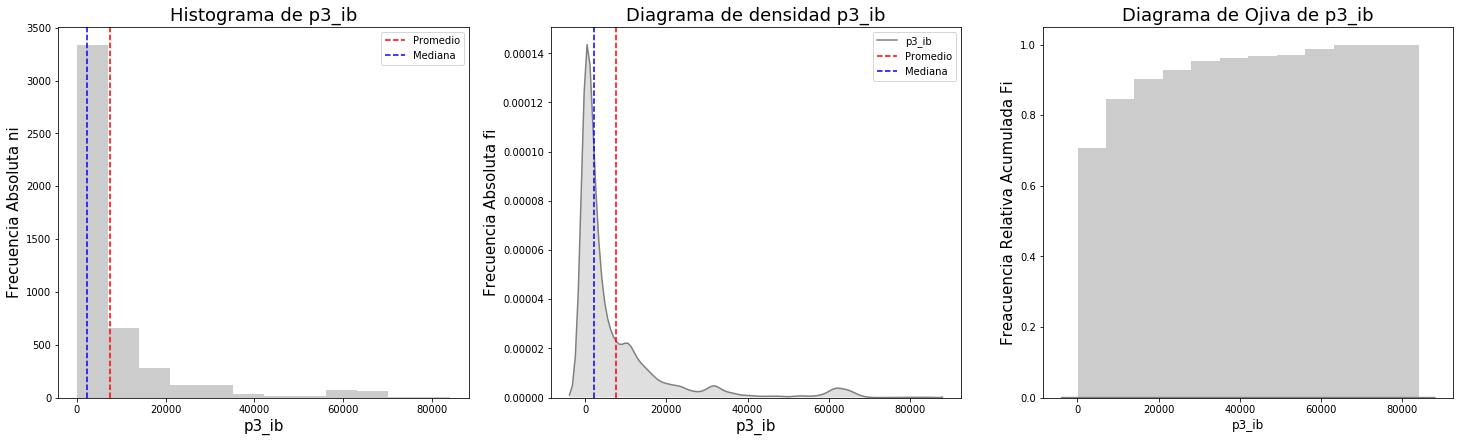

In [139]:
u = 11
print(colored(f'Tabla de frecuencia de {name_f[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_fl[u])
display(table_f)
hist_Ogive_plot(data_numeric_float_list[u],m,name_f[u])
fila = data[data_numeric_float_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

### Datos discretos

In [140]:
data_numeric_int_list = data_numeric_int  
tables_frequency_int = []
name = data_numeric_int
for j,i in enumerate(data_numeric_int_list):
    tables_frequency_int.append(made_frequency_table_A(i, data,1,name[j]))

Tabla de frecuencia de Netflows


,Netflows,ni,fi,Ni,Fi,Xí
0,"(1, 277.0)",4269,0.901965,4269,0.901965,139
1,"(277.0, 553.0)",309,0.0652863,4578,0.967251,415
2,"(553.0, 829.0)",100,0.0211282,4678,0.988379,691
3,"(829.0, 1105.0)",35,0.00739489,4713,0.995774,967
4,"(1105.0, 1381.0)",10,0.00211282,4723,0.997887,1243
5,"(1381.0, 1657.0)",4,0.00084513,4727,0.998732,1519
6,"(1657.0, 1933.0)",2,0.000422565,4729,0.999155,1795
7,"(1933.0, 2209.0)",0,0,4729,0.999155,2071
8,"(2209.0, 2485.0)",1,0.000211282,4730,0.999366,2347
9,"(2485.0, 2761.0)",0,0,4730,0.999366,2623


El coeficiente de asimetria es de 5.126296273613274, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 47.86490564357646, la distribución es Leptocúrtica.


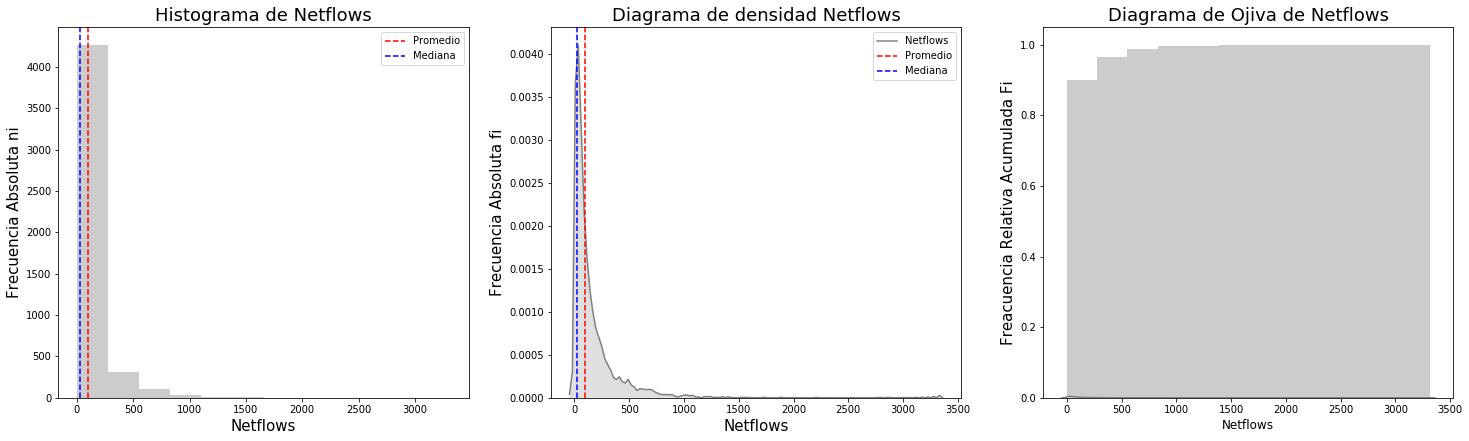

In [141]:
u = 0
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de #packets


,#packets,ni,fi,Ni,Fi,Xí
0,"(1, 16567.08333)",4644,0.981196,4644,0.981196,8284.04
1,"(16567.08333, 33133.16666)",64,0.0135221,4708,0.994718,24850.1
2,"(33133.16666, 49699.24999)",14,0.00295795,4722,0.997676,41416.2
3,"(49699.24999, 66265.33332)",4,0.00084513,4726,0.998521,57982.3
4,"(66265.33332, 82831.41665)",2,0.000422565,4728,0.998944,74548.4
5,"(82831.41665, 99397.49998)",1,0.000211282,4729,0.999155,91114.5
6,"(99397.49998, 115963.58331)",1,0.000211282,4730,0.999366,107681
7,"(115963.58331, 132529.66664)",0,0,4730,0.999366,124247
8,"(132529.66664, 149095.74997)",0,0,4730,0.999366,140813
9,"(149095.74997, 165661.8333)",0,0,4730,0.999366,157379


El coeficiente de asimetria es de 13.328879122018789, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 290.70214951933355, la distribución es Leptocúrtica.


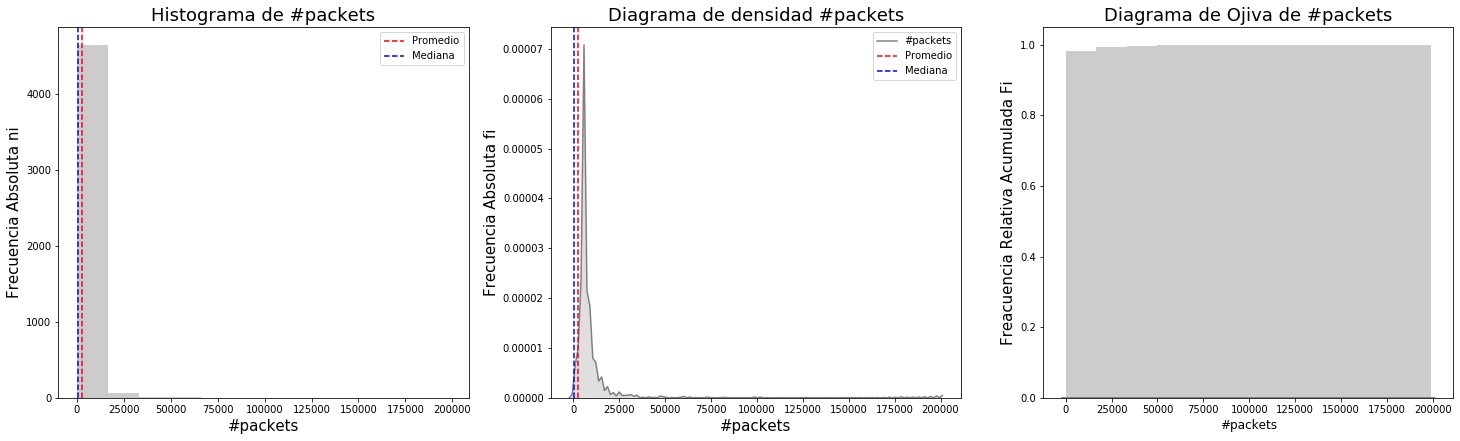

In [142]:
u = 1
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de Avg_bps


,Avg_bps,ni,fi,Ni,Fi,Xí
0,"(0, 596797.33333)",4643,0.980985,4643,0.980985,298399
1,"(596797.33333, 1193594.66666)",75,0.0158462,4718,0.996831,895196
2,"(1193594.66666, 1790391.99999)",8,0.00169026,4726,0.998521,1.49199e+06
3,"(1790391.99999, 2387189.33332)",0,0,4726,0.998521,2.08879e+06
4,"(2387189.33332, 2983986.66665)",3,0.000633847,4729,0.999155,2.68559e+06
5,"(2983986.66665, 3580783.99998)",1,0.000211282,4730,0.999366,3.28239e+06
6,"(3580783.99998, 4177581.33331)",0,0,4730,0.999366,3.87918e+06
7,"(4177581.33331, 4774378.66664)",2,0.000422565,4732,0.999789,4.47598e+06
8,"(4774378.66664, 5371175.99997)",0,0,4732,0.999789,5.07278e+06
9,"(5371175.99997, 5967973.3333)",0,0,4732,0.999789,5.66957e+06


El coeficiente de asimetria es de 12.972738540541425, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 304.806458595678, la distribución es Leptocúrtica.


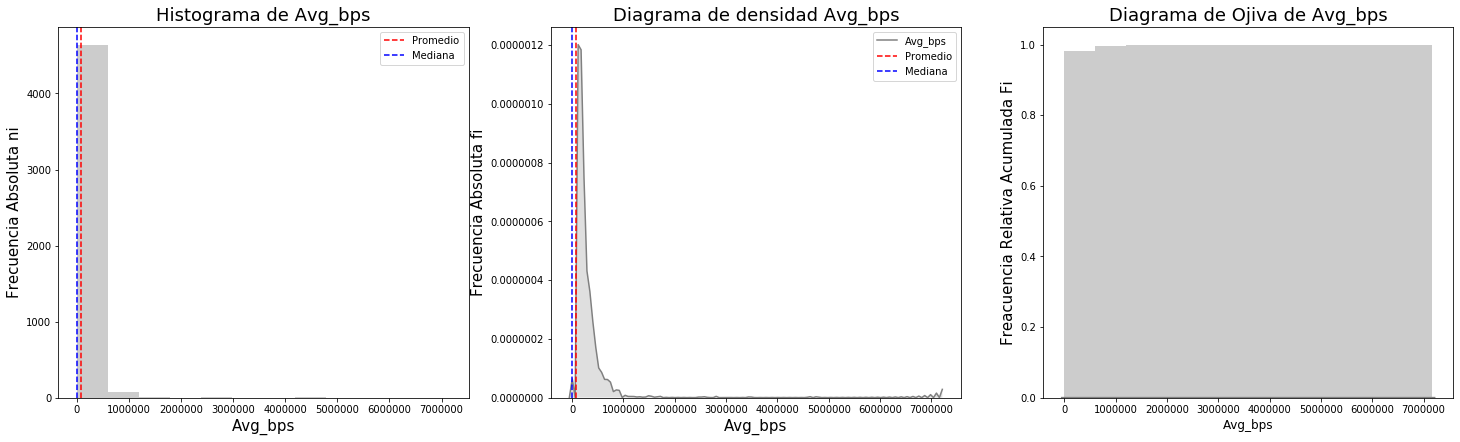

In [143]:
u = 2
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de Avg_pps


,Avg_pps,ni,fi,Ni,Fi,Xí
0,"(0, 111.08333)",4682,0.989225,4682,0.989225,55.5417
1,"(111.08333, 222.16666)",42,0.00887386,4724,0.998098,166.625
2,"(222.16666, 333.24999)",4,0.00084513,4728,0.998944,277.708
3,"(333.24999, 444.33332)",1,0.000211282,4729,0.999155,388.792
4,"(444.33332, 555.41665)",0,0,4729,0.999155,499.875
5,"(555.41665, 666.49998)",2,0.000422565,4731,0.999577,610.958
6,"(666.49998, 777.58331)",1,0.000211282,4732,0.999789,722.042
7,"(777.58331, 888.66664)",0,0,4732,0.999789,833.125
8,"(888.66664, 999.74997)",0,0,4732,0.999789,944.208
9,"(999.74997, 1110.8333)",0,0,4732,0.999789,1055.29


El coeficiente de asimetria es de 15.317764212641718, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 452.45050352975636, la distribución es Leptocúrtica.


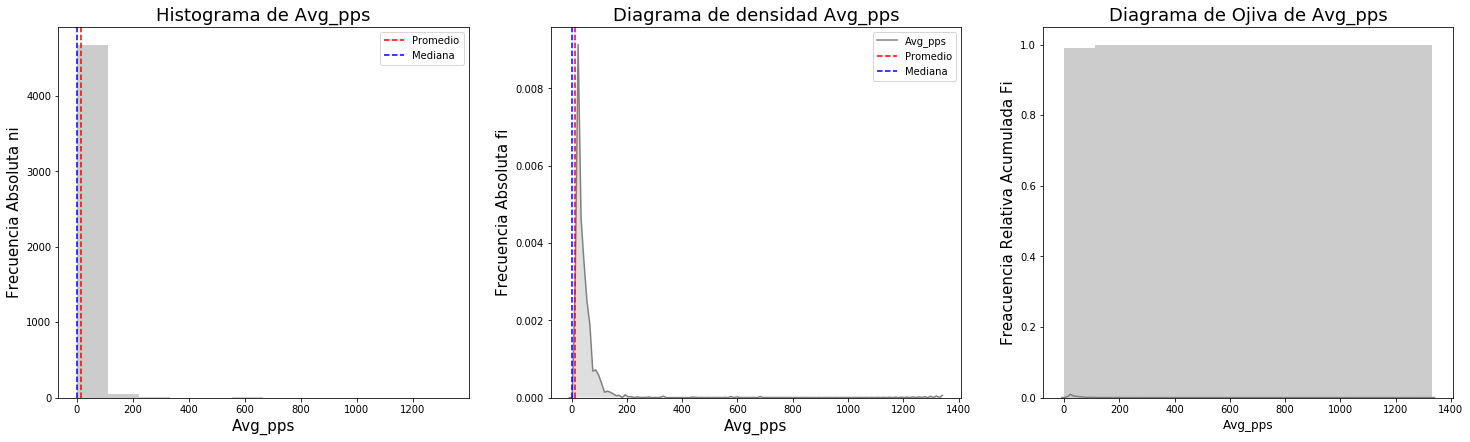

In [144]:
u = 3
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de Avg_bpp


,Avg_bpp,ni,fi,Ni,Fi,Xí
0,"(0, 113.0)",899,0.189943,899,0.189943,56.5
1,"(113.0, 226.0)",1302,0.27509,2201,0.465033,169.5
2,"(226.0, 339.0)",266,0.0562011,2467,0.521234,282.5
3,"(339.0, 452.0)",721,0.152335,3188,0.673569,395.5
4,"(452.0, 565.0)",281,0.0593704,3469,0.732939,508.5
5,"(565.0, 678.0)",146,0.0308472,3615,0.763786,621.5
6,"(678.0, 791.0)",260,0.0549334,3875,0.81872,734.5
7,"(791.0, 904.0)",720,0.152123,4595,0.970843,847.5
8,"(904.0, 1017.0)",120,0.0253539,4715,0.996197,960.5
9,"(1017.0, 1130.0)",13,0.00274667,4728,0.998944,1073.5


El coeficiente de asimetria es de 0.6483857271865442, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de -1.0174855123943296, la distribución es Platicúrtica.


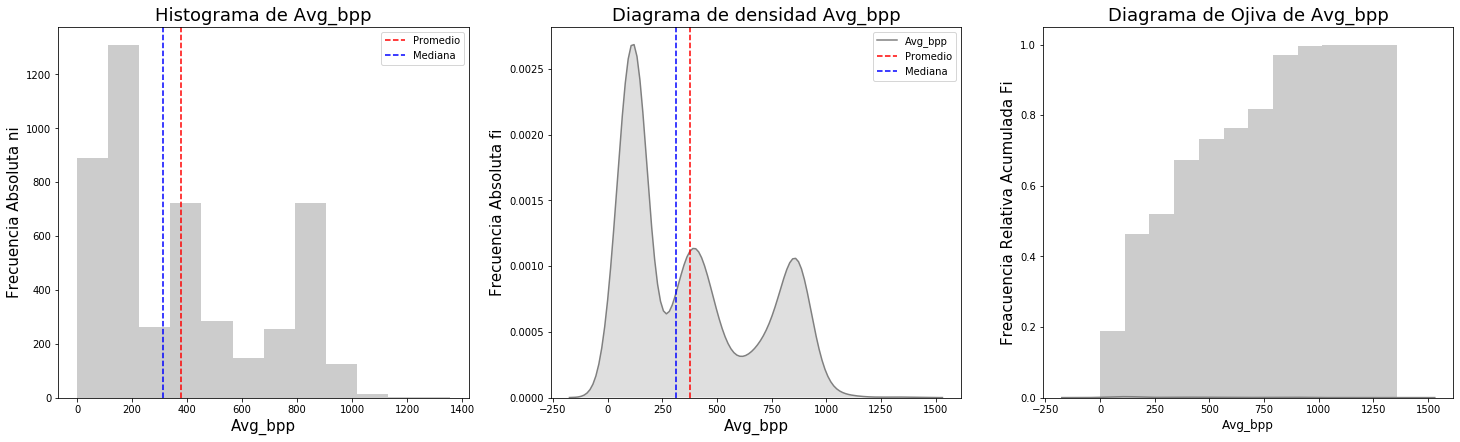

In [145]:
u = 4
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de #Bytes


,#Bytes,ni,fi,Ni,Fi,Xí
0,"(33, 21761947.41667)",4697,0.992394,4697,0.992394,1.0881e+07
1,"(21761947.41667, 43523861.83334)",23,0.0048595,4720,0.997253,3.26429e+07
2,"(43523861.83334, 65285776.25001)",7,0.00147898,4727,0.998732,5.44048e+07
3,"(65285776.25001, 87047690.66668)",0,0,4727,0.998732,7.61667e+07
4,"(87047690.66668, 108809605.08335)",3,0.000633847,4730,0.999366,9.79286e+07
5,"(108809605.08335, 130571519.50002)",0,0,4730,0.999366,1.19691e+08
6,"(130571519.50002, 152333433.91669)",0,0,4730,0.999366,1.41452e+08
7,"(152333433.91669, 174095348.33336)",1,0.000211282,4731,0.999577,1.63214e+08
8,"(174095348.33336, 195857262.75003)",1,0.000211282,4732,0.999789,1.84976e+08
9,"(195857262.75003, 217619177.1667)",0,0,4732,0.999789,2.06738e+08


El coeficiente de asimetria es de 19.78679552229511, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 578.5559044833593, la distribución es Leptocúrtica.


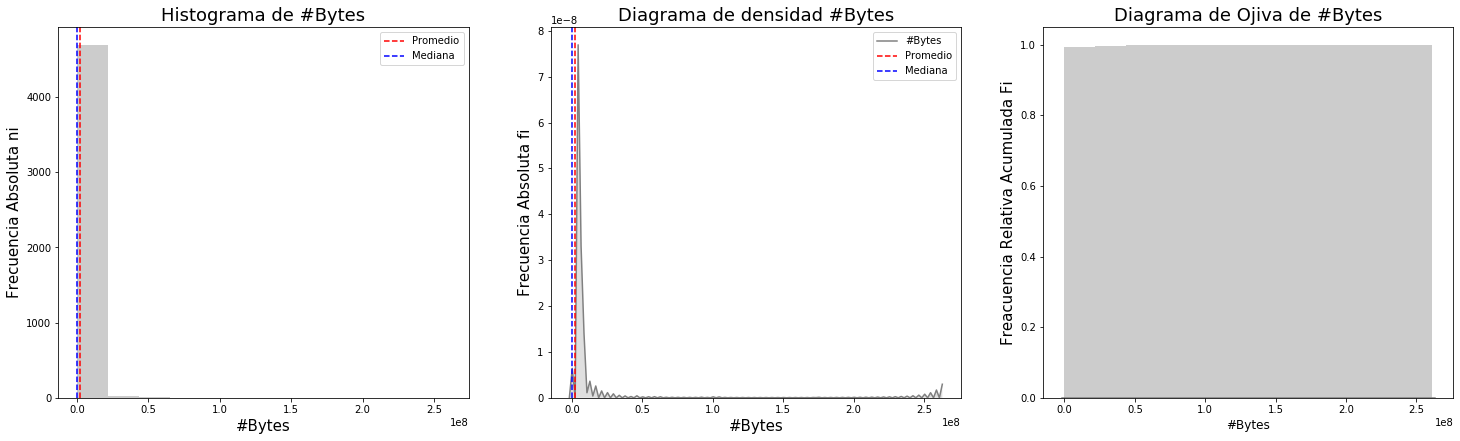

In [146]:
u = 5
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de #sp


,#sp,ni,fi,Ni,Fi,Xí
0,"(1, 63.0)",3892,0.822311,3892,0.822311,32
1,"(63.0, 125.0)",506,0.106909,4398,0.92922,94
2,"(125.0, 187.0)",164,0.0346503,4562,0.963871,156
3,"(187.0, 249.0)",92,0.019438,4654,0.983309,218
4,"(249.0, 311.0)",38,0.00802873,4692,0.991337,280
5,"(311.0, 373.0)",20,0.00422565,4712,0.995563,342
6,"(373.0, 435.0)",5,0.00105641,4717,0.996619,404
7,"(435.0, 497.0)",6,0.00126769,4723,0.997887,466
8,"(497.0, 559.0)",4,0.00084513,4727,0.998732,528
9,"(559.0, 621.0)",1,0.000211282,4728,0.998944,590


El coeficiente de asimetria es de 3.7900532834440366, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 22.18061667491279, la distribución es Leptocúrtica.


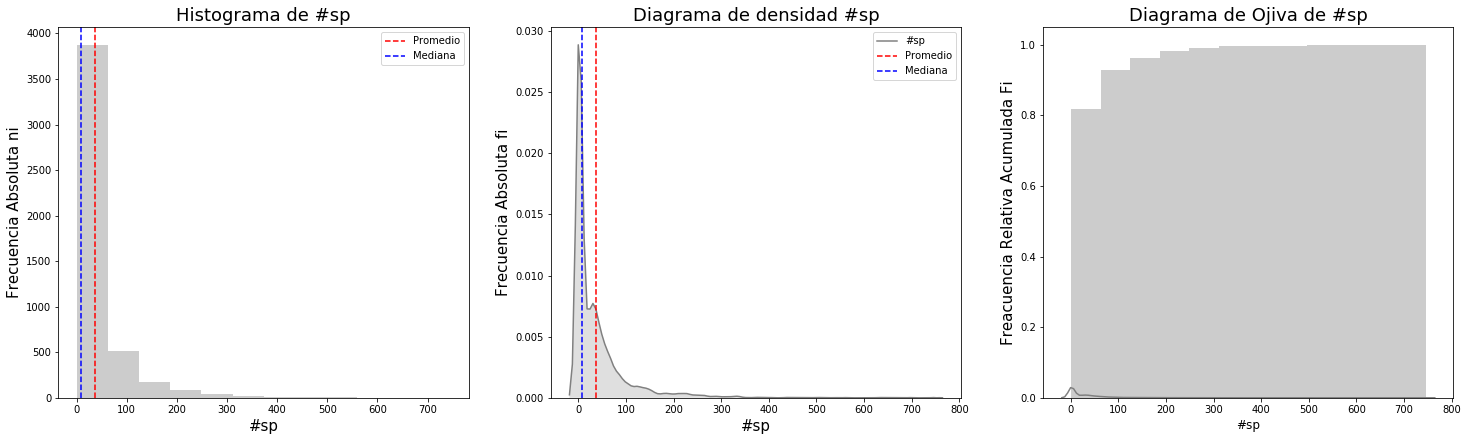

In [147]:
u = 6
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de #dp


,#dp,ni,fi,Ni,Fi,Xí
0,"(1, 62.58333)",3942,0.832876,3942,0.832876,31.7917
1,"(62.58333, 124.16666)",467,0.0986689,4409,0.931544,93.375
2,"(124.16666, 185.74999)",159,0.0335939,4568,0.965138,154.958
3,"(185.74999, 247.33332)",88,0.0185929,4656,0.983731,216.542
4,"(247.33332, 308.91665)",37,0.00781745,4693,0.991549,278.125
5,"(308.91665, 370.49998)",19,0.00401437,4712,0.995563,339.708
6,"(370.49998, 432.08331)",5,0.00105641,4717,0.996619,401.292
7,"(432.08331, 493.66664)",7,0.00147898,4724,0.998098,462.875
8,"(493.66664, 555.24997)",3,0.000633847,4727,0.998732,524.458
9,"(555.24997, 616.8333)",2,0.000422565,4729,0.999155,586.042


El coeficiente de asimetria es de 3.892243320032096, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 23.004691089232608, la distribución es Leptocúrtica.


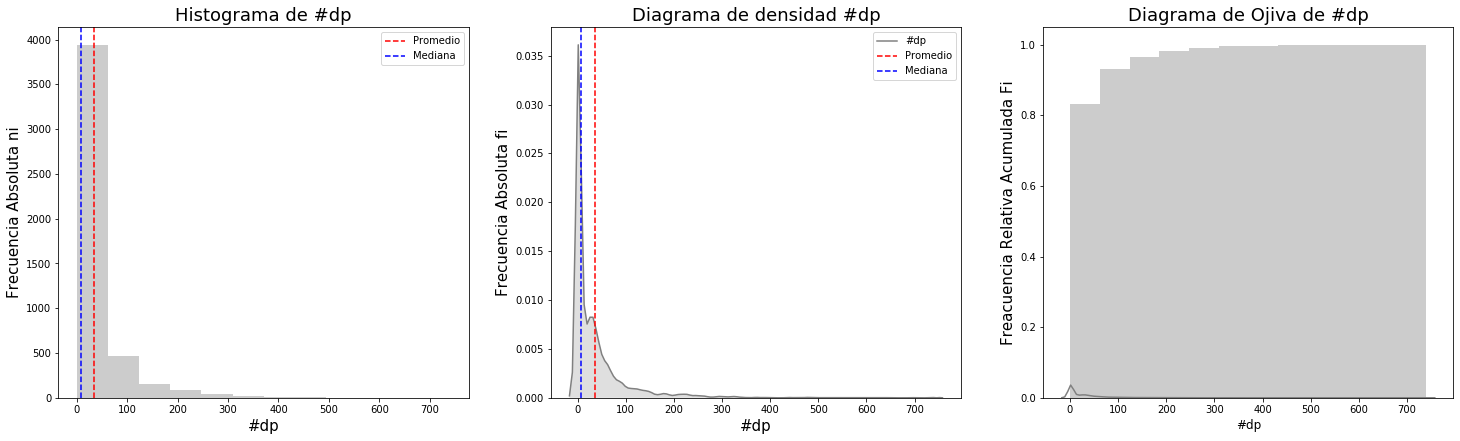

In [148]:
u = 7
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de first_sp


,first_sp,ni,fi,Ni,Fi,Xí
0,"(0, 5399.16667)",4004,0.845975,4004,0.845975,2699.58
1,"(5399.16667, 10798.33334)",0,0,4004,0.845975,8098.75
2,"(10798.33334, 16197.50001)",2,0.000422565,4006,0.846398,13497.9
3,"(16197.50001, 21596.66668)",0,0,4006,0.846398,18897.1
4,"(21596.66668, 26995.83335)",0,0,4006,0.846398,24296.3
5,"(26995.83335, 32395.00002)",0,0,4006,0.846398,29695.4
6,"(32395.00002, 37794.16669)",3,0.000633847,4009,0.847031,35094.6
7,"(37794.16669, 43193.33336)",6,0.00126769,4015,0.848299,40493.8
8,"(43193.33336, 48592.50003)",7,0.00147898,4022,0.849778,45892.9
9,"(48592.50003, 53991.6667)",242,0.0511304,4264,0.900909,51292.1


El coeficiente de asimetria es de 1.9195291193682702, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 1.77835057737936, la distribución es Platicúrtica.


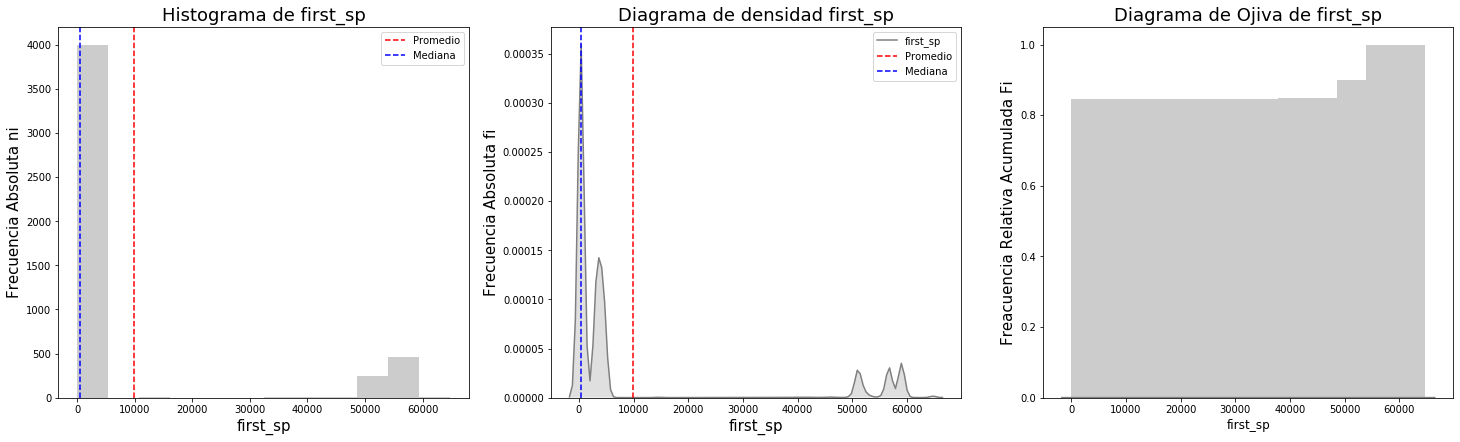

In [149]:
u = 8
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de first_dp


,first_dp,ni,fi,Ni,Fi,Xí
0,"(53, 5447.75)",3937,0.831819,3937,0.831819,2750.38
1,"(5447.75, 10842.5)",0,0,3937,0.831819,8145.12
2,"(10842.5, 16237.25)",2,0.000422565,3939,0.832242,13539.9
3,"(16237.25, 21632.0)",0,0,3939,0.832242,18934.6
4,"(21632.0, 27026.75)",0,0,3939,0.832242,24329.4
5,"(27026.75, 32421.5)",0,0,3939,0.832242,29724.1
6,"(32421.5, 37816.25)",7,0.00147898,3946,0.833721,35118.9
7,"(37816.25, 43211.0)",8,0.00169026,3954,0.835411,40513.6
8,"(43211.0, 48605.75)",9,0.00190154,3963,0.837312,45908.4
9,"(48605.75, 54000.5)",223,0.047116,4186,0.884428,51303.1


El coeficiente de asimetria es de 1.7796355693961392, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 1.2492379071411541, la distribución es Platicúrtica.


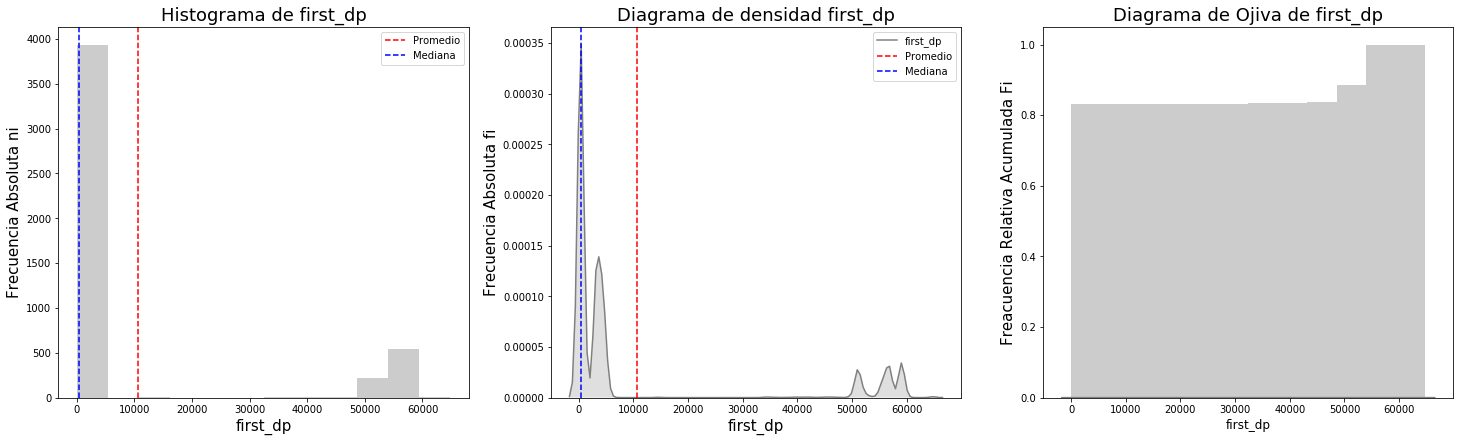

In [150]:
u = 9
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de second_sp


,second_sp,ni,fi,Ni,Fi,Xí
0,"(0, 5399.16667)",2776,0.58652,2776,0.58652,2699.58
1,"(5399.16667, 10798.33334)",0,0,2776,0.58652,8098.75
2,"(10798.33334, 16197.50001)",190,0.0401437,2966,0.626664,13497.9
3,"(16197.50001, 21596.66668)",0,0,2966,0.626664,18897.1
4,"(21596.66668, 26995.83335)",0,0,2966,0.626664,24296.3
5,"(26995.83335, 32395.00002)",0,0,2966,0.626664,29695.4
6,"(32395.00002, 37794.16669)",35,0.00739489,3001,0.634059,35094.6
7,"(37794.16669, 43193.33336)",45,0.00950771,3046,0.643566,40493.8
8,"(43193.33336, 48592.50003)",52,0.0109867,3098,0.654553,45892.9
9,"(48592.50003, 53991.6667)",552,0.116628,3650,0.771181,51292.1


El coeficiente de asimetria es de 0.5363462649652034, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de -1.6247630540902436, la distribución es Platicúrtica.


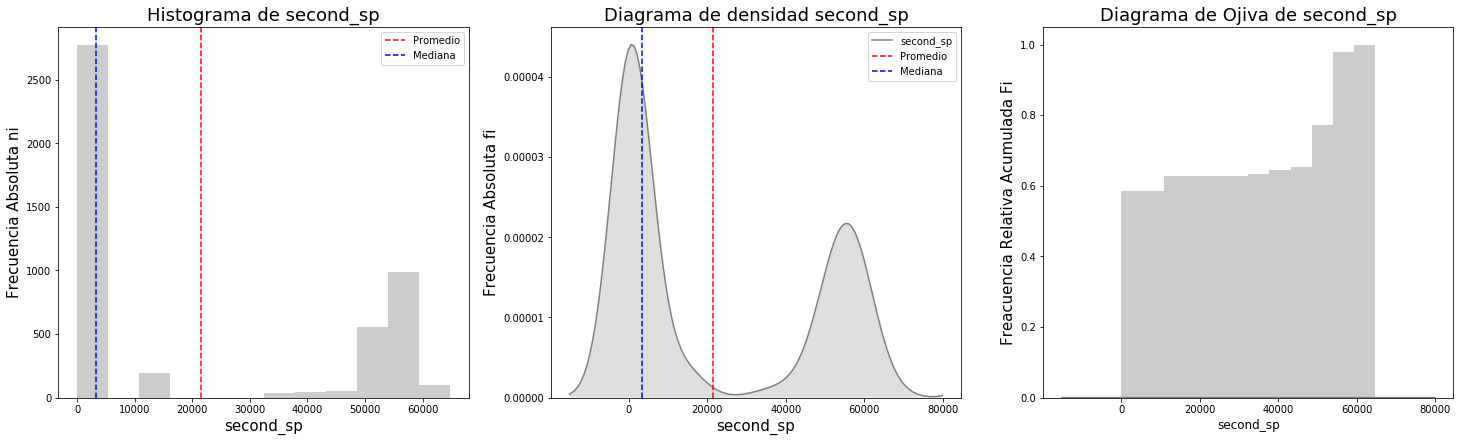

In [151]:
u = 10
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de second_dp


,second_dp,ni,fi,Ni,Fi,Xí
0,"(53, 5447.75)",2857,0.603634,2857,0.603634,2750.38
1,"(5447.75, 10842.5)",0,0,2857,0.603634,8145.12
2,"(10842.5, 16237.25)",190,0.0401437,3047,0.643778,13539.9
3,"(16237.25, 21632.0)",0,0,3047,0.643778,18934.6
4,"(21632.0, 27026.75)",0,0,3047,0.643778,24329.4
5,"(27026.75, 32421.5)",0,0,3047,0.643778,29724.1
6,"(32421.5, 37816.25)",39,0.00824002,3086,0.652018,35118.9
7,"(37816.25, 43211.0)",40,0.0084513,3126,0.660469,40513.6
8,"(43211.0, 48605.75)",41,0.00866258,3167,0.669132,45908.4
9,"(48605.75, 54000.5)",568,0.120008,3735,0.78914,51303.1


El coeficiente de asimetria es de 0.6128984277038716, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de -1.531731479988415, la distribución es Platicúrtica.


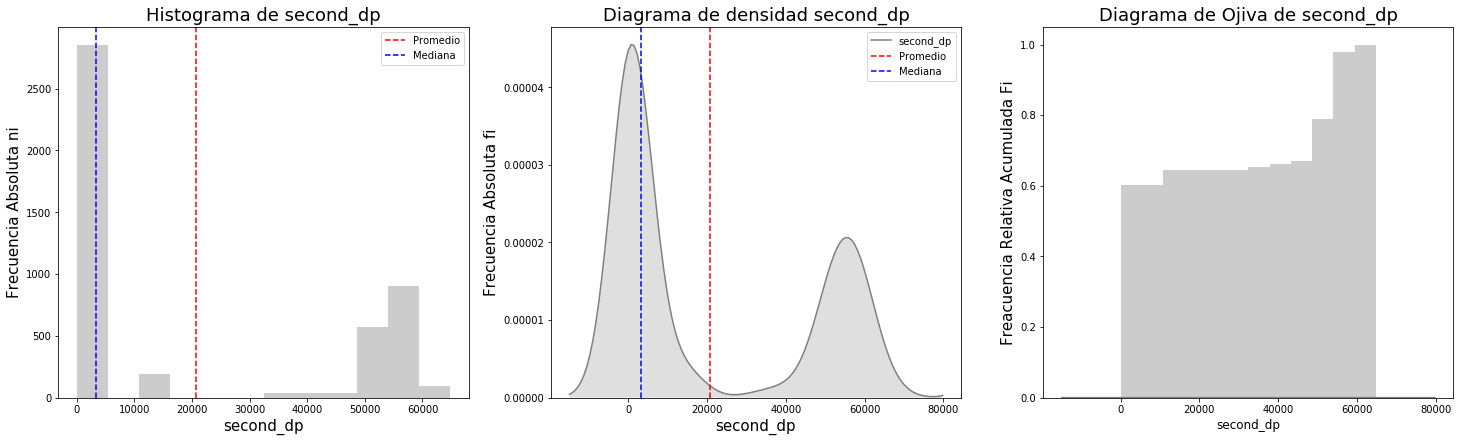

In [152]:
u = 11
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de third_sp


,third_sp,ni,fi,Ni,Fi,Xí
0,"(0, 5424.41667)",3836,0.81048,3836,0.81048,2712.21
1,"(5424.41667, 10848.83334)",2,0.000422565,3838,0.810902,8136.63
2,"(10848.83334, 16273.25001)",0,0,3838,0.810902,13561
3,"(16273.25001, 21697.66668)",0,0,3838,0.810902,18985.5
4,"(21697.66668, 27122.08335)",0,0,3838,0.810902,24409.9
5,"(27122.08335, 32546.50002)",0,0,3838,0.810902,29834.3
6,"(32546.50002, 37970.91669)",153,0.0323262,3991,0.843228,35258.7
7,"(37970.91669, 43395.33336)",124,0.026199,4115,0.869427,40683.1
8,"(43395.33336, 48819.75003)",144,0.0304247,4259,0.899852,46107.5
9,"(48819.75003, 54244.1667)",240,0.0507078,4499,0.95056,51532


El coeficiente de asimetria es de 1.71807369948324, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 1.1591736728649167, la distribución es Platicúrtica.


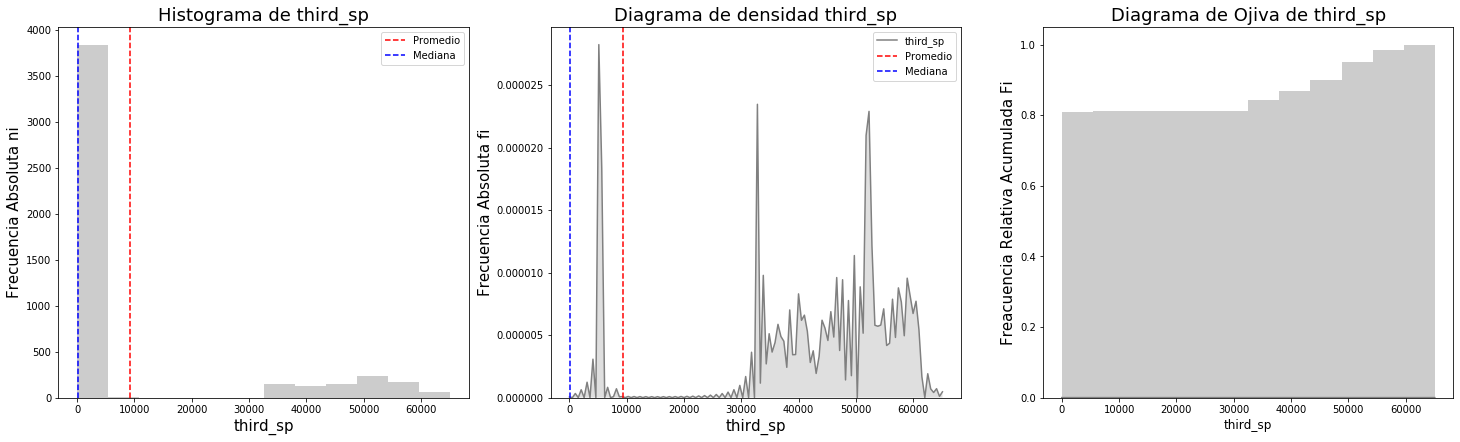

In [153]:
u = 12
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

Tabla de frecuencia de third_dp


,third_dp,ni,fi,Ni,Fi,Xí
0,"(53, 5131.0)",4216,0.890767,4216,0.890767,2592
1,"(5131.0, 10209.0)",60,0.0126769,4276,0.903444,7670
2,"(10209.0, 15287.0)",0,0,4276,0.903444,12748
3,"(15287.0, 20365.0)",0,0,4276,0.903444,17826
4,"(20365.0, 25443.0)",0,0,4276,0.903444,22904
5,"(25443.0, 30521.0)",0,0,4276,0.903444,27982
6,"(30521.0, 35599.0)",32,0.00676104,4308,0.910205,33060
7,"(35599.0, 40677.0)",65,0.0137334,4373,0.923938,38138
8,"(40677.0, 45755.0)",51,0.0107754,4424,0.934714,43216
9,"(45755.0, 50833.0)",63,0.0133108,4487,0.948025,48294


El coeficiente de asimetria es de 2.84903875735369, la distribución es Asimetrica con cola hacia la derecha.
El coeficiente de curtosis es de 6.4069594143351125, la distribución es Platicúrtica.


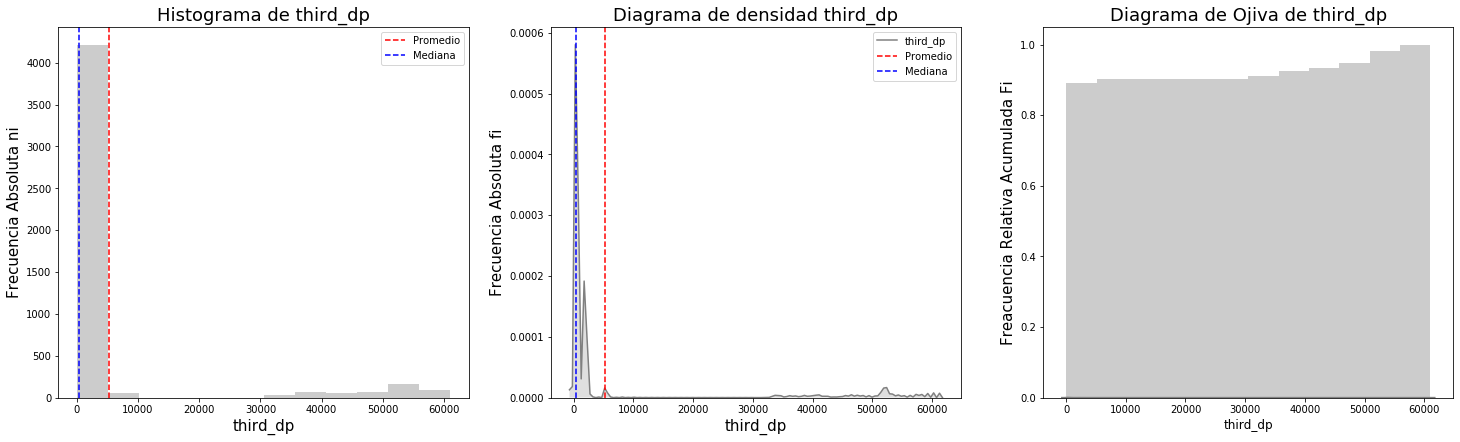

In [154]:
u = 13
print(colored(f'Tabla de frecuencia de {name[u]}',attrs=['bold']))
table_f = pd.DataFrame(tables_frequency_int[u])
display(table_f)
hist_Ogive_plot(data_numeric_int_list[u],m,name[u])
fila = data[data_numeric_int_list[u]]
asimetria, curtosis, message, message_2 = is_asimetric_curtosis(fila)
print(colored(f'El coeficiente de asimetria es de {asimetria}, la distribución es {message}.',attrs=['bold']))
print(colored(f'El coeficiente de curtosis es de {curtosis}, la distribución es {message_2}.',attrs=['bold']))

In [155]:
#data.to_csv('Data_No_Identificada_Tratada.csv',index = False)